# 데이터 파악하기

In [ ]:
import numpy as np # 수치 계산
import pandas as pd # 데이터 조작
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [ ]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
dtype: object

In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_train.shape

(891, 12)

### 결측치 확인하기

In [ ]:
for col in df_train.columns:
  msg = 'columns: {:>11}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

print()
(df_train.isnull().sum() * 100 / df_train.shape[0]).apply("{:.2f}%".format)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:    Survived	 Percent of NaN value: 0.00%
columns:      Pclass	 Percent of NaN value: 0.00%
columns:        Name	 Percent of NaN value: 0.00%
columns:         Sex	 Percent of NaN value: 0.00%
columns:         Age	 Percent of NaN value: 19.87%
columns:       SibSp	 Percent of NaN value: 0.00%
columns:       Parch	 Percent of NaN value: 0.00%
columns:      Ticket	 Percent of NaN value: 0.00%
columns:        Fare	 Percent of NaN value: 0.00%
columns:       Cabin	 Percent of NaN value: 77.10%
columns:    Embarked	 Percent of NaN value: 0.22%



PassengerId     0.00%
Survived        0.00%
Pclass          0.00%
Name            0.00%
Sex             0.00%
Age            19.87%
SibSp           0.00%
Parch           0.00%
Ticket          0.00%
Fare            0.00%
Cabin          77.10%
Embarked        0.22%
dtype: object

In [ ]:
df_train['Cabin'].isnull().sum()

687

In [ ]:
df_train['Cabin'].shape

(891,)

In [ ]:
df_train['Cabin'].isnull().sum() / df_train['Cabin'].shape

array([0.77104377])

In [ ]:
for col in df_test.columns:
  msg = 'columns: {:>11}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:      Pclass	 Percent of NaN value: 0.00%
columns:        Name	 Percent of NaN value: 0.00%
columns:         Sex	 Percent of NaN value: 0.00%
columns:         Age	 Percent of NaN value: 20.57%
columns:       SibSp	 Percent of NaN value: 0.00%
columns:       Parch	 Percent of NaN value: 0.00%
columns:      Ticket	 Percent of NaN value: 0.00%
columns:        Fare	 Percent of NaN value: 0.24%
columns:       Cabin	 Percent of NaN value: 78.23%
columns:    Embarked	 Percent of NaN value: 0.00%


<Axes: >

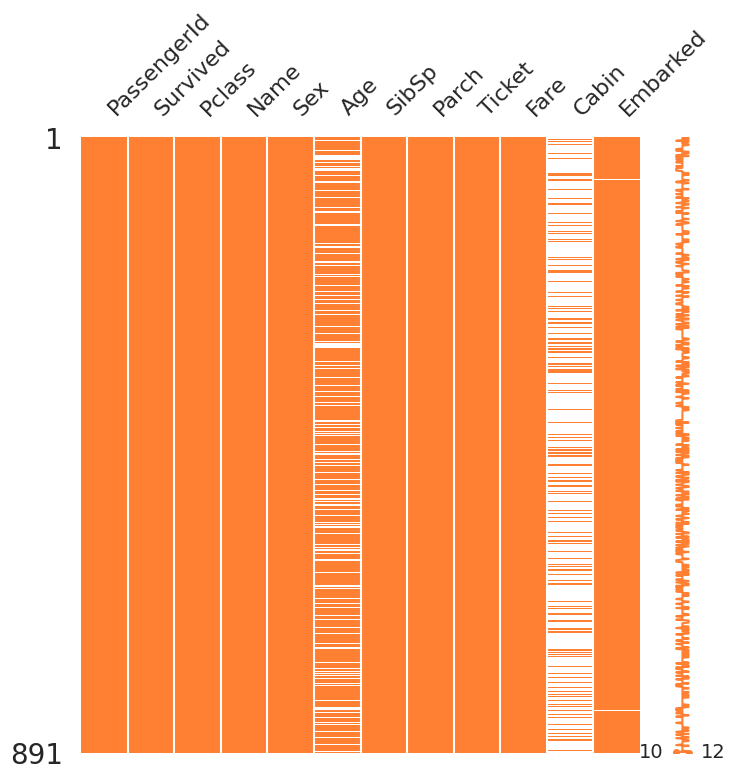

In [ ]:
msno.matrix(df=df_train, figsize=(8, 8), color=(1, 0.5, 0.2)) # 데이터의 분포를 보기 쉬움

In [ ]:
df_train.iloc[1:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: >

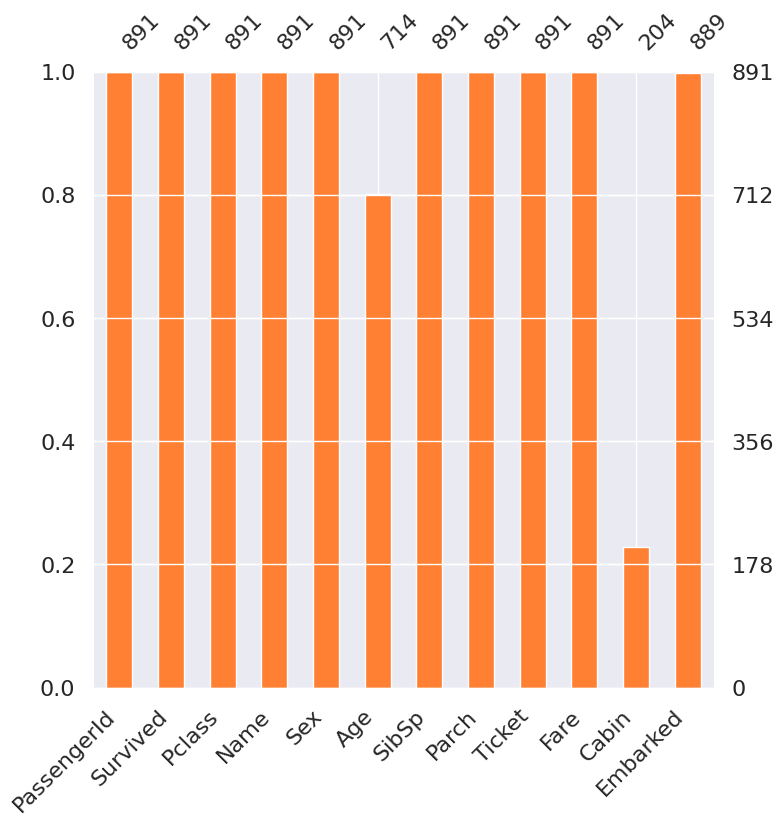

In [ ]:
msno.bar(df=df_train, figsize=(8, 8), color=(1, 0.5, 0.2)) # 데이터 퍼센트를 보기 쉬움

<Axes: >

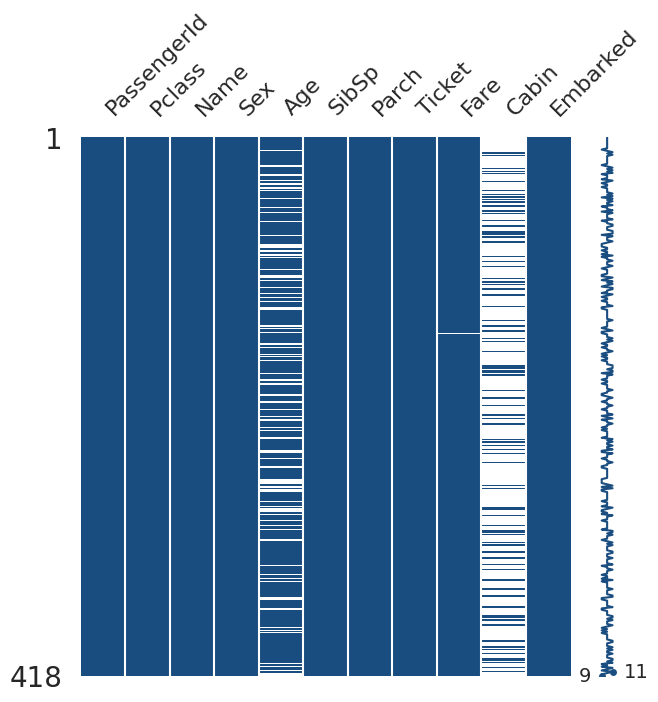

In [ ]:
msno.matrix(df_test, figsize = (7, 7), color = (0.1, 0.3, 0.5))

<Axes: >

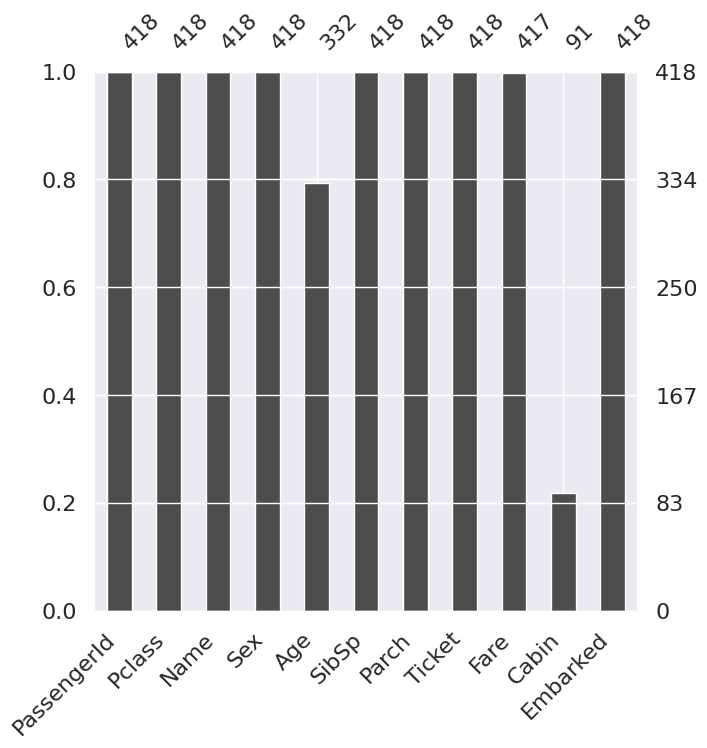

In [ ]:
msno.bar(df_test, figsize = (7, 7), color = (0.3, 0.3, 0.3))

### 타겟 레이블 비율 확인하기
타겟 레이블의 비율이 밸런스있는지에 따라 모델평가 방식, 채우는 방법이 달라짐 => 확인필요


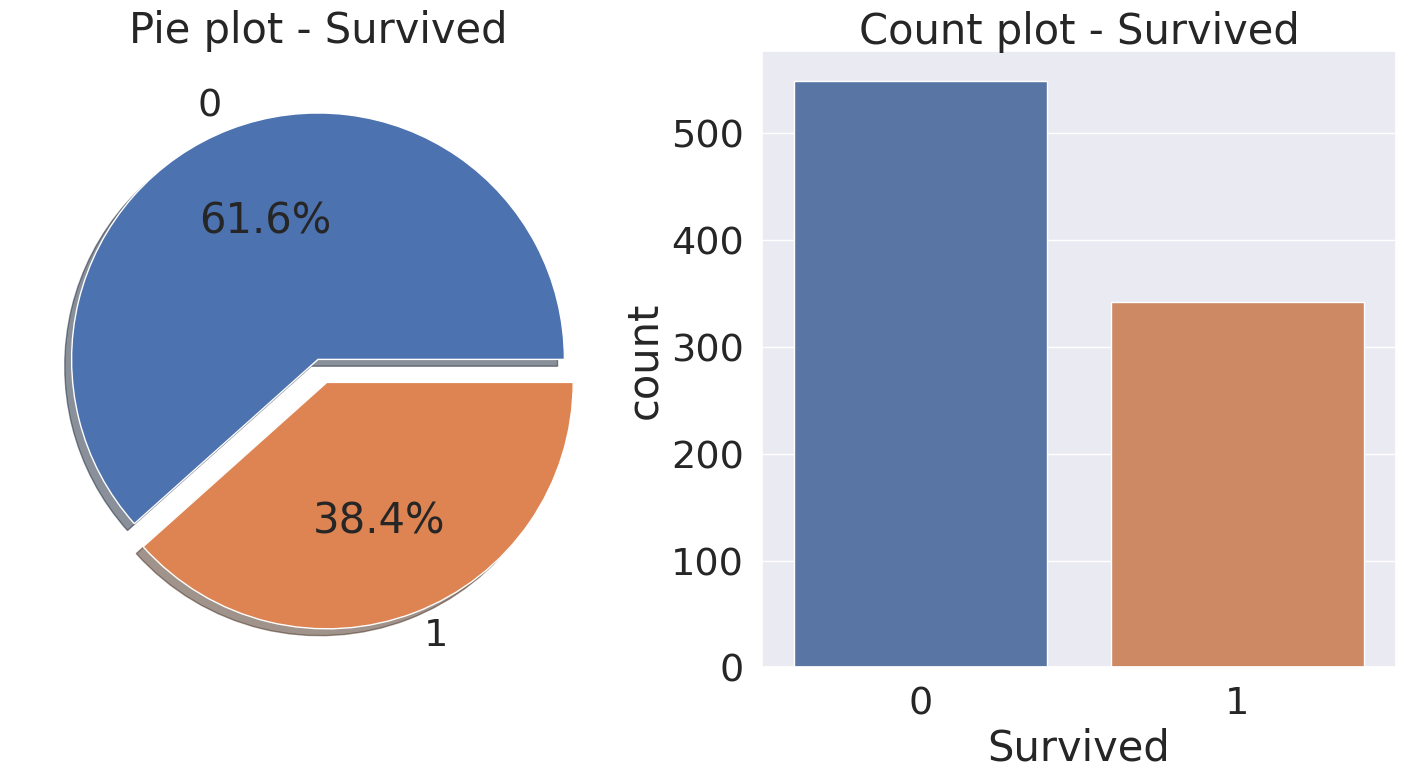

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8)) # 도화지를 준비하는 과정(1행 2열 도화지), 행 18, 열 8 크기

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow = True) # explode : 그래프 안의 간격을 분리 // autopct : 그래프 안 텍스트 포맷 형식 // ax : 그려줄 도화지 선택 // shadow : 그래프 내부에 그림자 추가
ax[0].set_title('Pie plot - Survived') # 제목
ax[0].set_ylabel('') # ylabel 없앰
sns.countplot(x='Survived', data=df_train, ax=ax[1])  # 카운트를 해주는 그래프(여기서는 Survived)
ax[1].set_title('Count plot - Survived')
plt.show()


61% 생존 38% 죽음 => 밸런스 맞음
<->
99% 생존 1% 죽음 => 언밸런스

In [ ]:
df_train['Survived'].value_counts() # 각 열값의 갯수를 가져옴

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

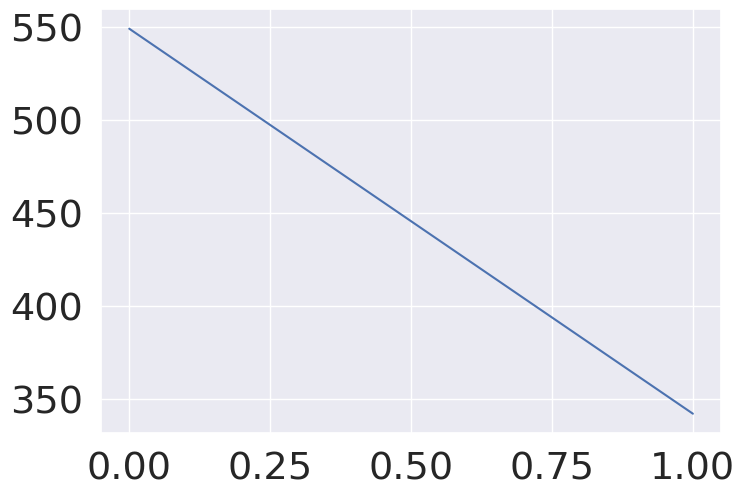

In [ ]:
df_train['Survived'].value_counts().plot() # 시리즈 객체는 plot이 가능 -> plt.plot(~) 로도 가능

<Axes: ylabel='Survived'>

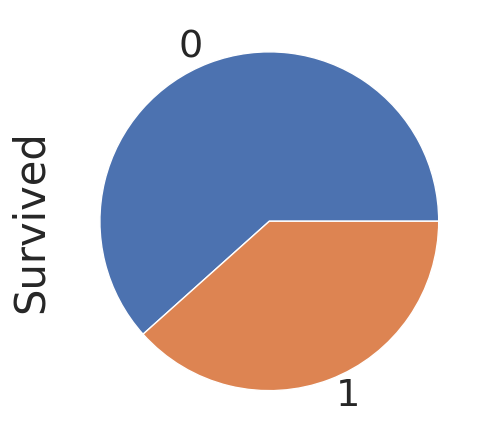

In [ ]:
df_train['Survived'].value_counts().plot.pie() # explode : 그래프 안의 간격을 분리 // autopct : 그래프 안 텍스트 포맷 형식 // ax : 그려줄 도화지 선택 // shadow : 그래프 내부에 그림자 추가

# EDA(Exploratory Data Analysis) - 탐색적 데이터 분석
어떤 피쳐가 중요한지, 어떤 상관관계가 있는지 확인하여 어떤 피쳐를 사용할지 파악하는 단계
=> 모델 성능과 연관
=> 통계적인 인사이트가 필요(그래프 해석 등)
=> 어떻게 그리면 내가 주장하고 싶은 것을 표현할 수 있을까?, 보고자 하는 것을 볼 수 있을까?

가설세우기 -> 그래프보기 -> 가설확인

In [ ]:
df_train.shape # 11개 피쳐 1개 타겟 레이블

(891, 12)

독창적으로 만들필요 없다. 베끼는 것이 아니라 가장 최적화 된 것을 가져올 뿐이다.

### Pclass - 서순형 데이터(Ordinal), 순서가 있는 카테고리형 데이터
Pclass에 따른 생존율 차이

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() # as_index=True 이면 해당 열을 인덱스값으로 사용함(디폴트)

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [ ]:
print(df_train['Survived'].unique())
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum() # 각각 1값을 더한거(총 각각의 생존 인원)

[0 1]


,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count() # 총 각각의 샘플이 몇개 있는지

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean() # 평균 => 0,1 값으로 구성된 데이터에서는 생존율을 뜻함 -> (0 * 사망자수 + 1 * 생존자수)/ 총샘플수 이기 때문

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True) # margins는 All의 여부

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived']).style.background_gradient(cmap='hsv') # 디자인 꾸미기
# https://matplotlib.org/stable/gallery/color/colormap_reference.html

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending = False) # 내림차순 정렬

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: >

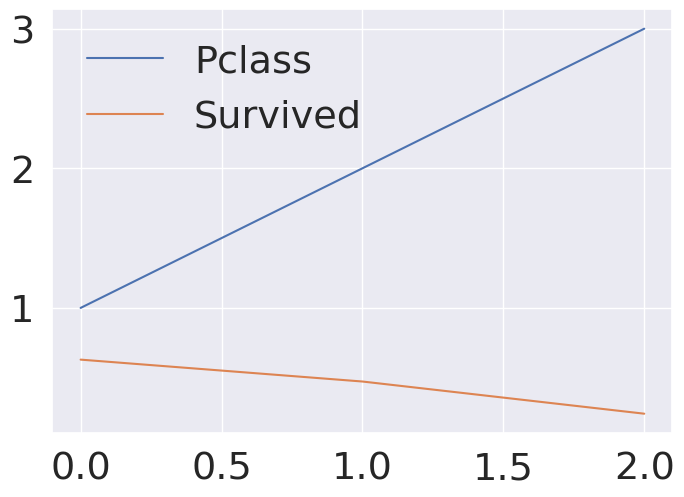

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending = False).plot() # 열이 2개이므로 그래프가 2개 나옴(의미없는 그래프)

<Axes: xlabel='Pclass'>

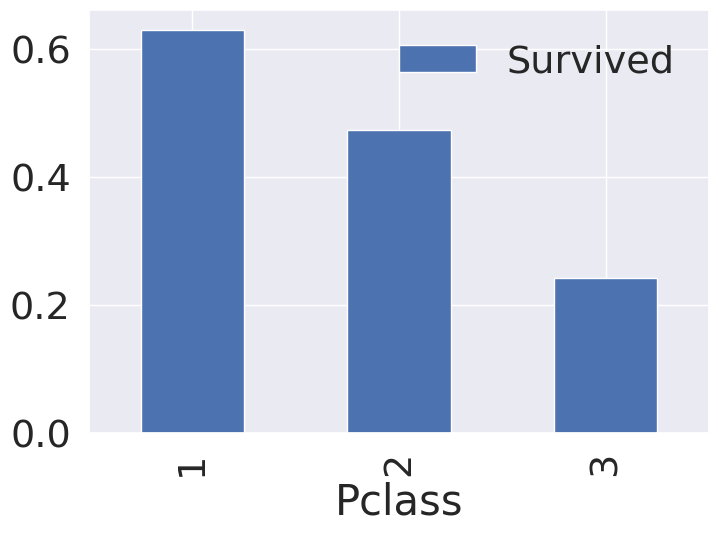

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending = False).plot.bar() # 생존율 그래프

Pclass가 높을수록 생존율이 높은것을 확인할 수 있음

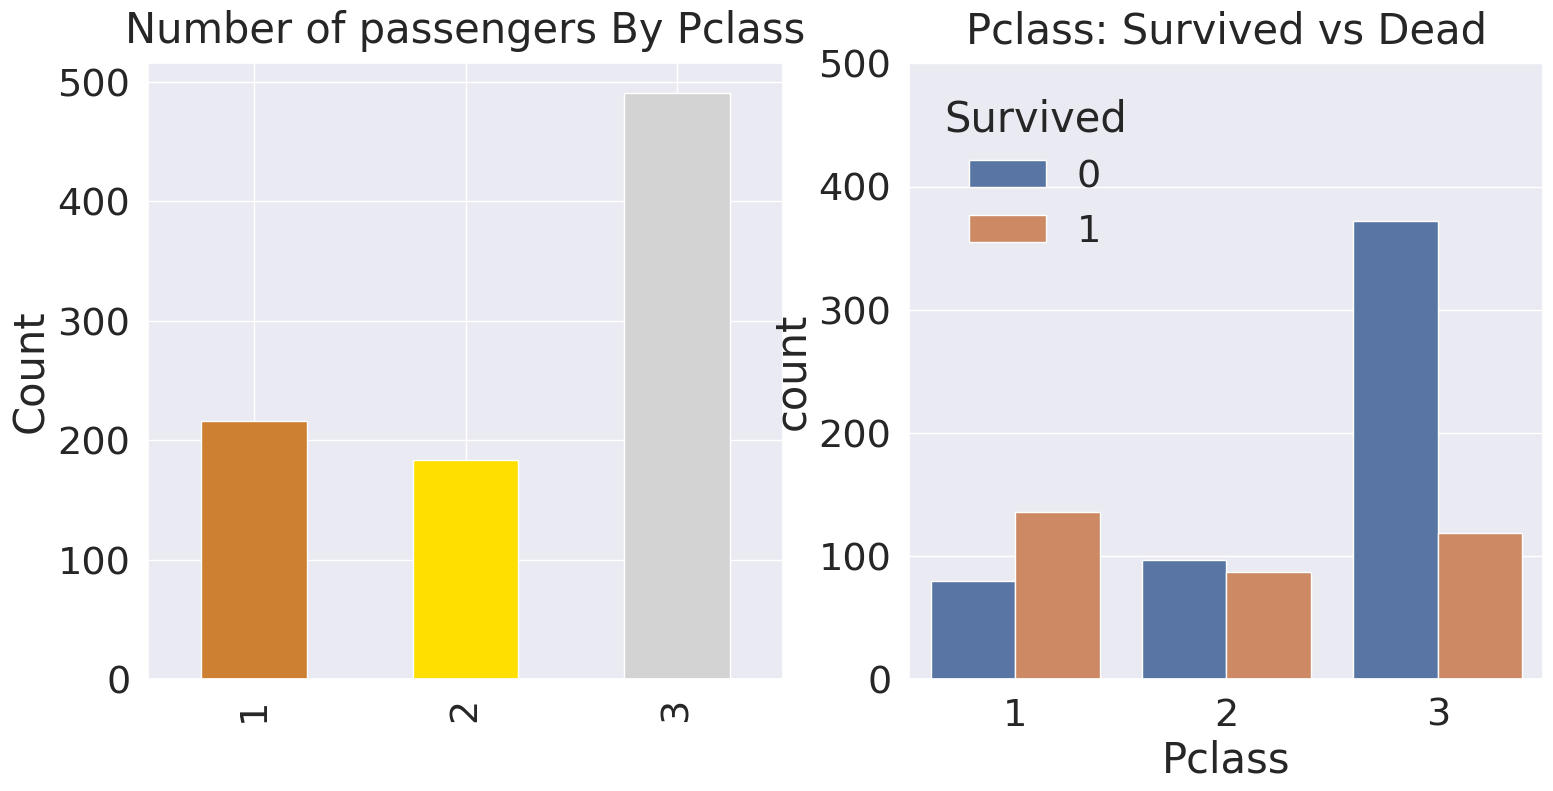

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().sort_index().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0]) # 각 pclass의 인원수
ax[0].set_title('Number of passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')

sns.countplot(x = 'Pclass', hue='Survived', data=df_train, ax=ax[1]) # 각 pclass에서의 생존자수과 사망자수 확인
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
ax[1].set_ylim(0, 500)
plt.show()

pclass가 높을수록 생존확률이 높다는 것을 눈으로 확인
-> model의 input으로 써도 좋을 것 같다는 인사이트
-> model 성능에 좋은 영향(생존을 잘 나눔)


### Sex - 카테고리형 변수

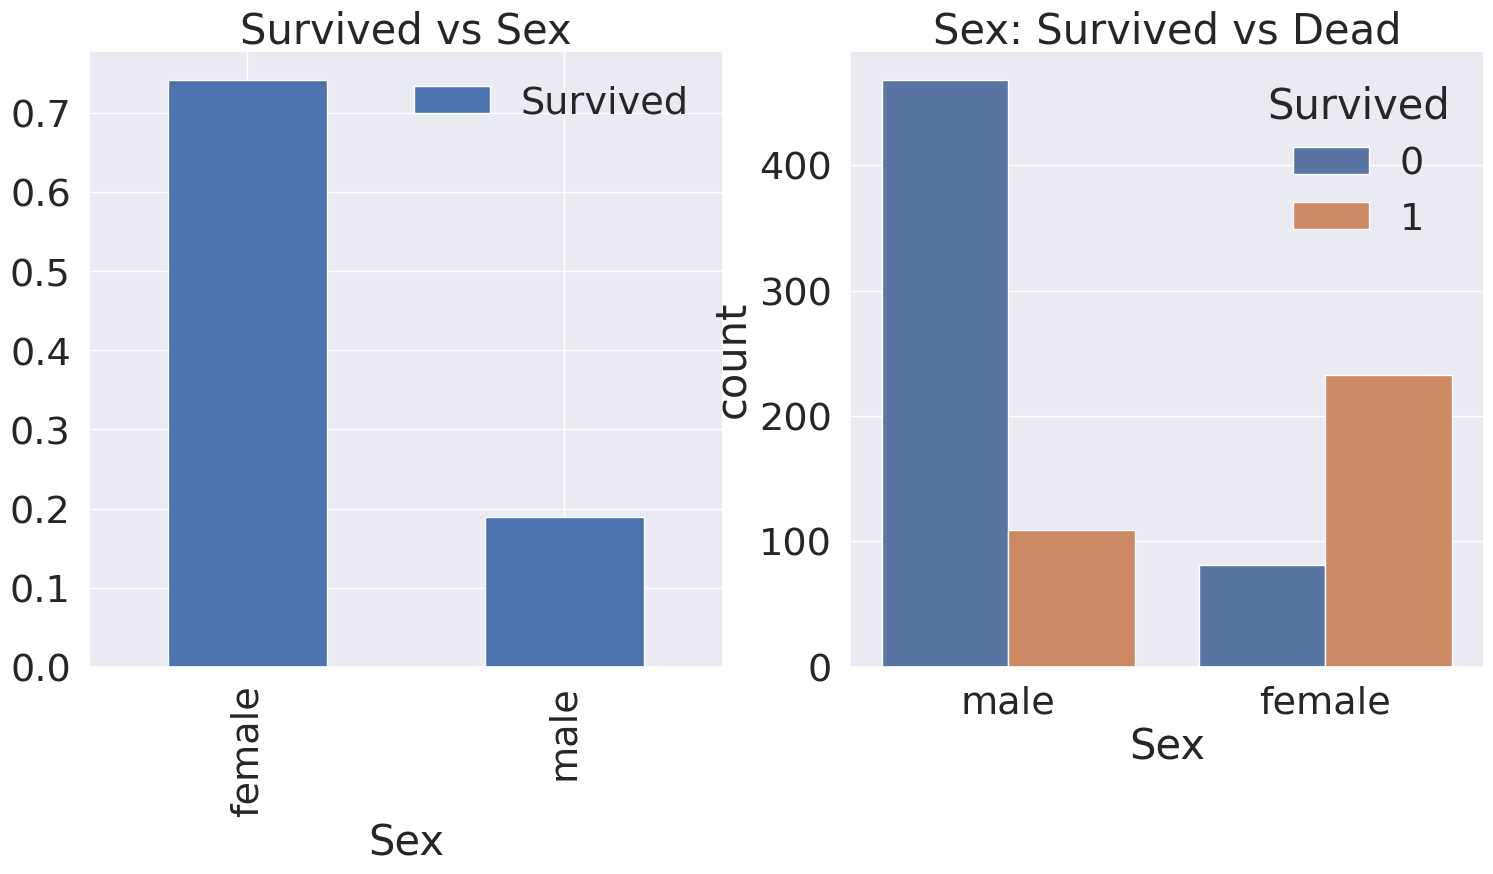

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x= 'Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

여성이 살 확률이 더 높음
남자의 경우 생존하지 못할 확률이 높음
성별과 생존확률은 연관이 있음 -> 성별은 생존 확률을 예측하는데 도움이 됨
=> 성별만 가지고도 여자만 골라도 70% 확률로 맞출 수 있음

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Sex and Pclass

<Axes: xlabel='Pclass', ylabel='Survived'>

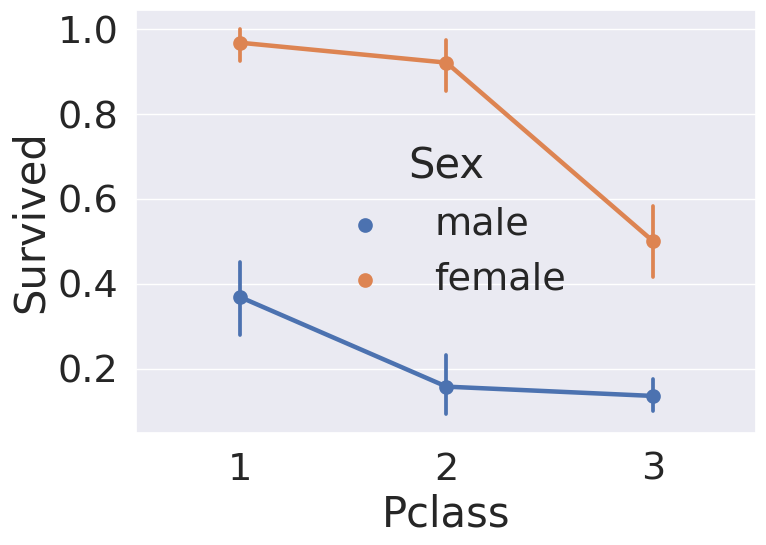

In [ ]:
sns.pointplot(x = 'Pclass', y = 'Survived', data=df_train, scale = 1.2, hue = 'Sex')

Pclass에 따라 생존률이 낮게되고, 어느 구간이든 여성이 좀더 많이 생존
-> 돈이 많을수록 생존에 유리, 여성이 좀더 생존에 유리

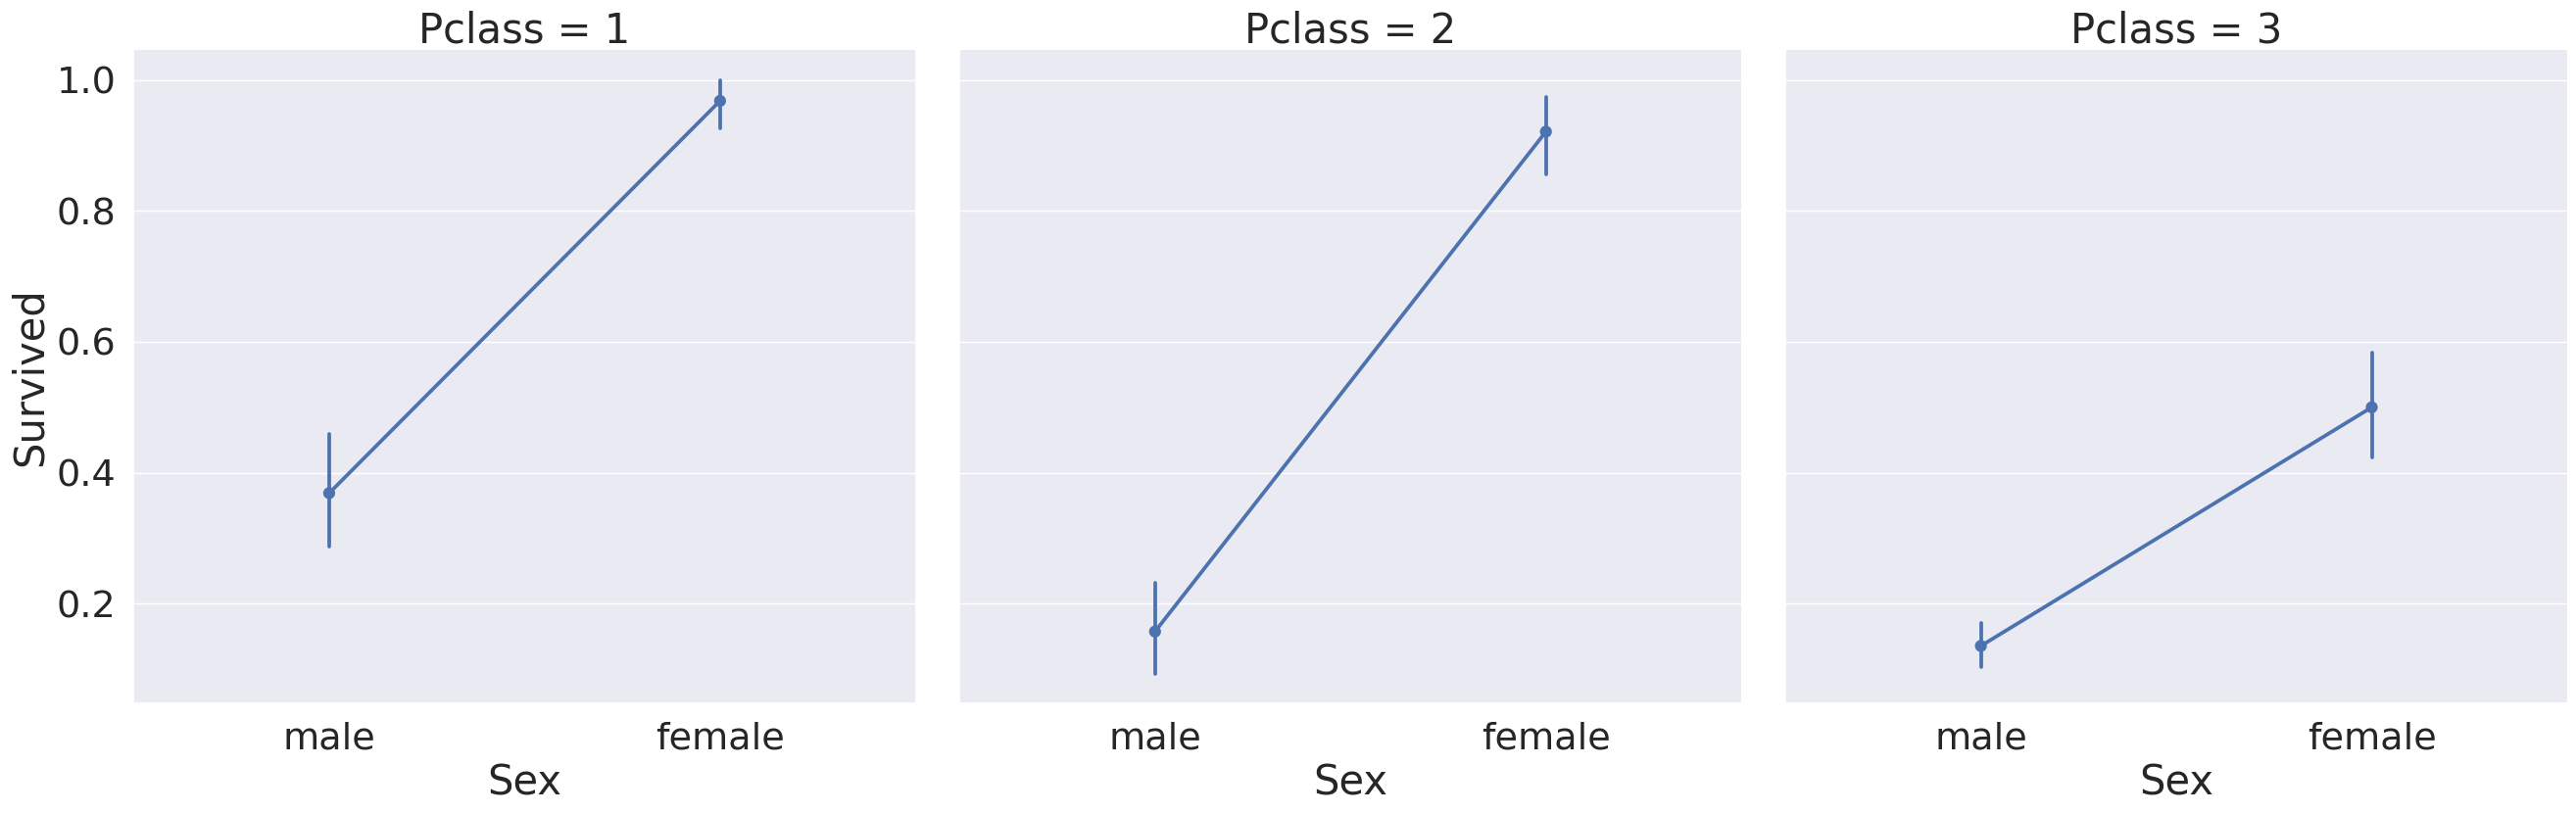

In [ ]:
sns.catplot(x = 'Sex', y = 'Survived', col='Pclass', data=df_train, kind='point', height=9, aspect=1)

각각의 클래스 마다 각 성별의 생존확률을 더 좋게 볼 수 있음

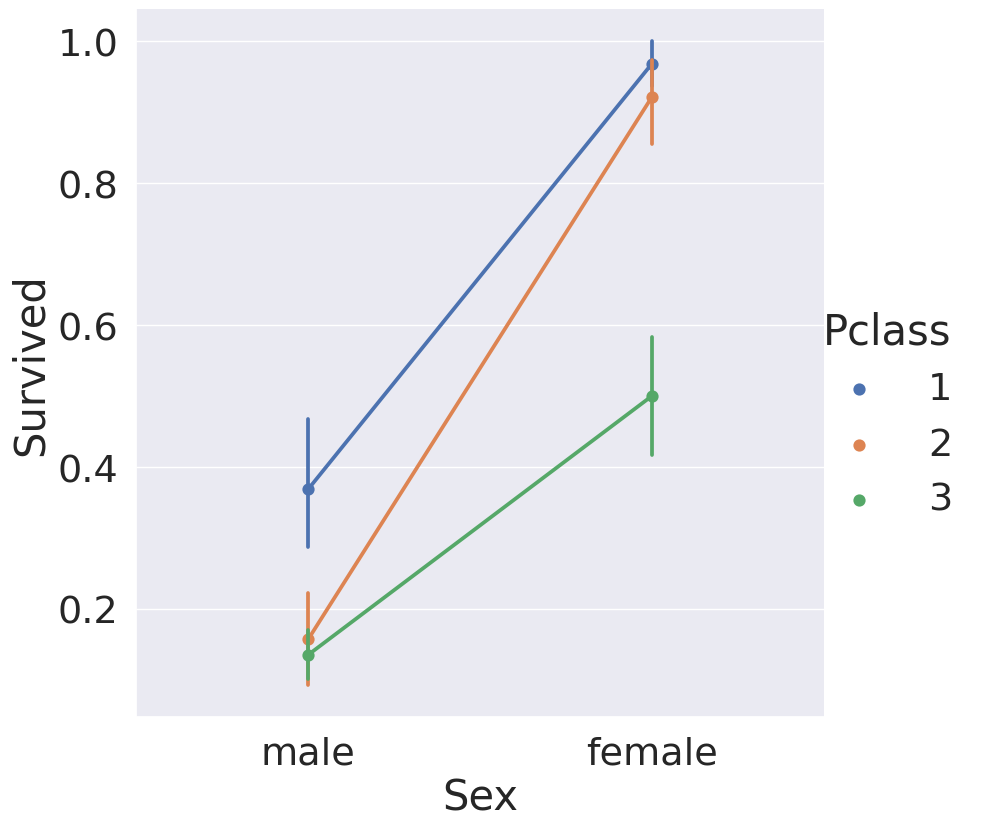

In [ ]:
sns.catplot(x = 'Sex', y = 'Survived', hue='Pclass', data=df_train, kind='point', height=9, aspect=1)

Pclass마다 각 성별의 생존확률을 잘 확인할 수 있음
점에 그려진 세로선은 error를 뜻함(바가 높을 수록 신뢰도가 낮음)

### Age

In [ ]:
print("제일 나이 많은 탑승객 : %.1f years" % df_train['Age'].max())
print("제일 나이 어린 탑승객 : %.1f years" % df_train['Age'].min())
print("탑승객 평균 나이 : %.1f years" % df_train['Age'].mean())

제일 나이 많은 탑승객 : 80.0 years
제일 나이 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


In [ ]:
foo = df_train['Age']

In [ ]:
foo.all() # 데이터가 전부 차있으면 True

True

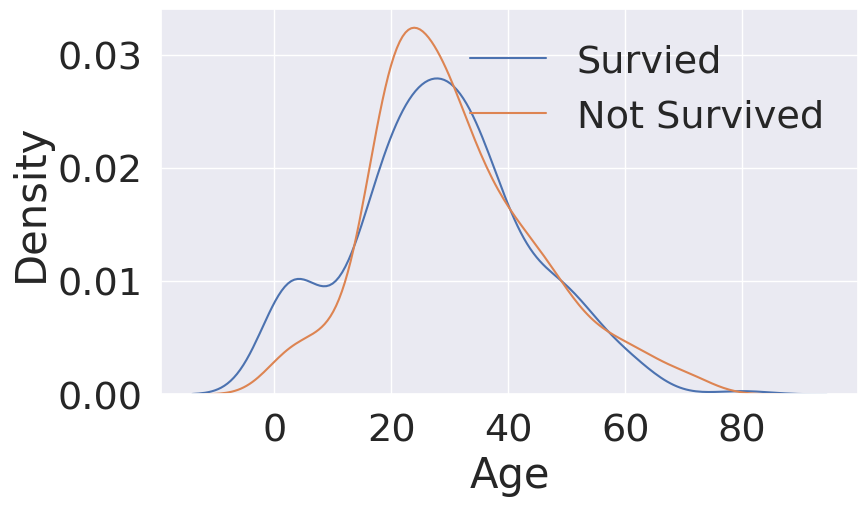

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survied', 'Not Survived'])
plt.show()

<Axes: >

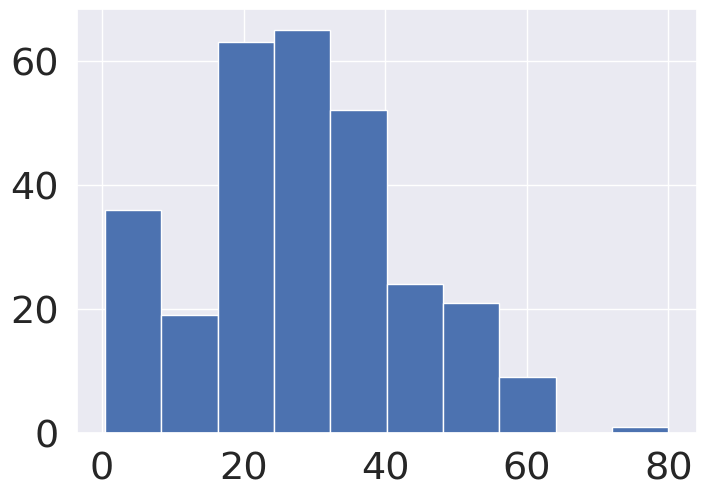

In [ ]:
df_train[df_train['Survived'] == 1]['Age'].hist()

히스토그램 그래프를 좀더 부드럽게 그린 것이 kde 그래프
히스토그램 : 각 값에 따른 분포를 알 수 있는것

나이가 적을수록 생존확률이 높다는 것을 볼 수 있음

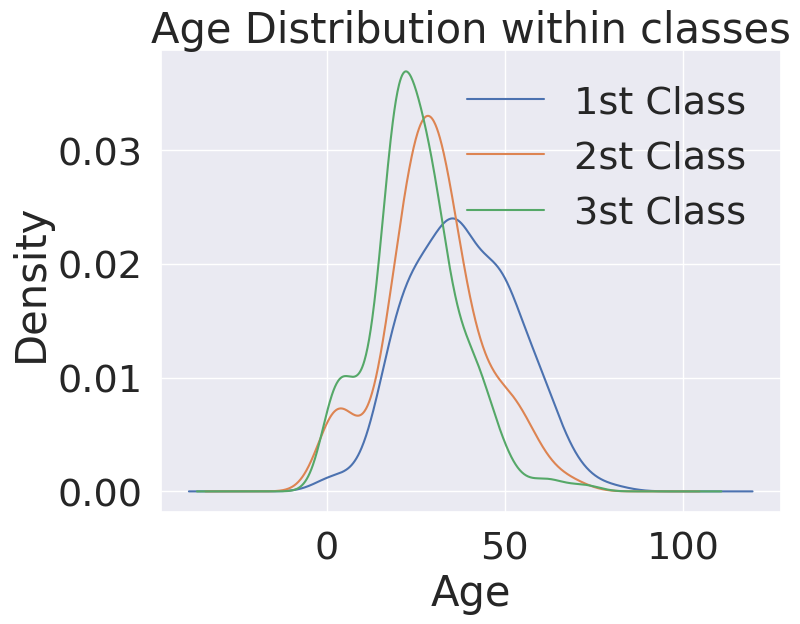

In [ ]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
# kind를 hist로 설정할 경우 그래프가 겹쳐서 잘 보이지 않음

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2st Class', '3st Class'])
plt.show()


클래스 마다 나이에 따른 분포를 알 수 있음

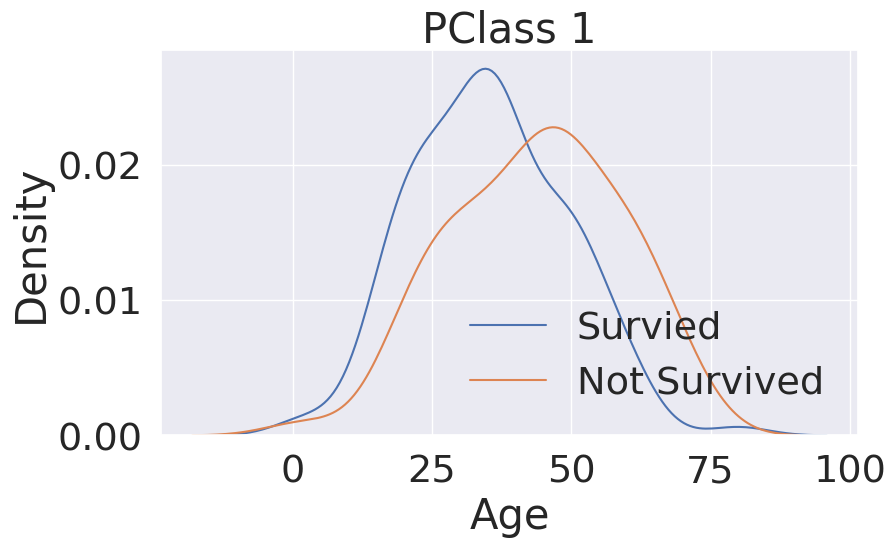

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
plt.title('PClass 1')
plt.legend(['Survied', 'Not Survived'])
plt.show()

클래스 마다의 나이 생존율 분포

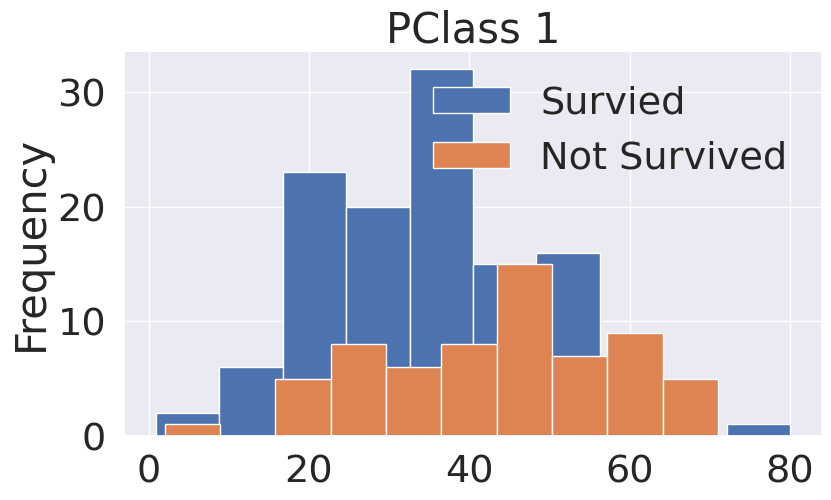

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
df_train['Age'][(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)].plot(kind='hist')
df_train['Age'][(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)].plot(kind='hist')
plt.title('PClass 1')
plt.legend(['Survied', 'Not Survived'])
plt.show()

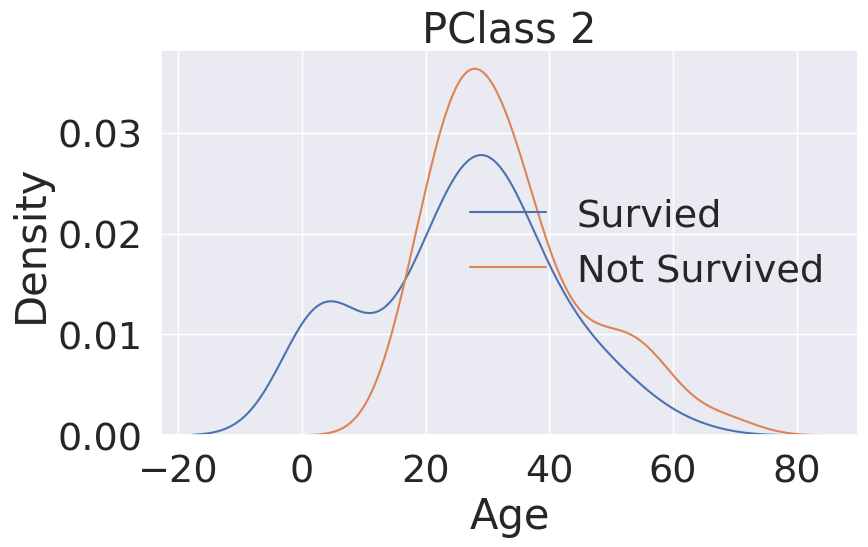

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
plt.title('PClass 2')
plt.legend(['Survied', 'Not Survived'])
plt.show()

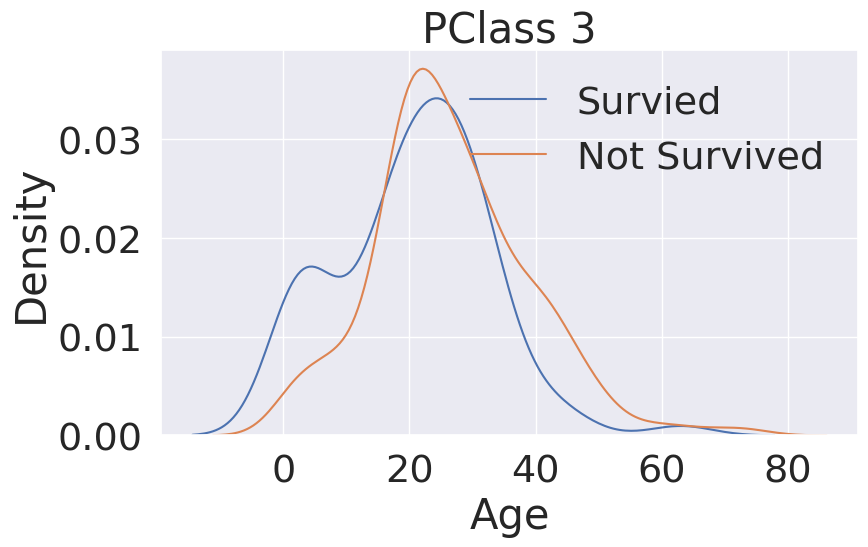

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
plt.title('PClass 3')
plt.legend(['Survied', 'Not Survived'])
plt.show()

#### 각 나이마다 생존률로 확인하기

In [ ]:
change_age_range_survival_ratio = []

for i in range(1, 80):
  change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])) # 각 나이마다의 (총 생존인원 / 총 인원 = 생존확률)를 저장

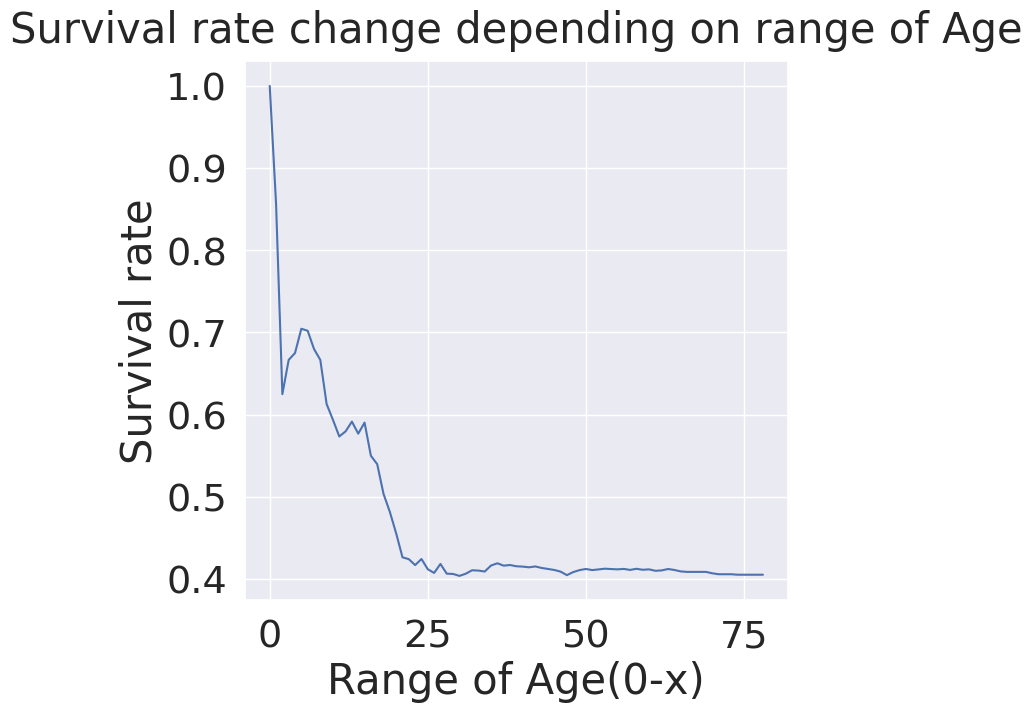

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.xlabel('Range of Age(0-x)')
plt.ylabel('Survival rate')
plt.show()

나이가 어릴 수록 생존률이 높다는 것을 확실하게 확인할 수 있음

### Pclass, Sex, Age

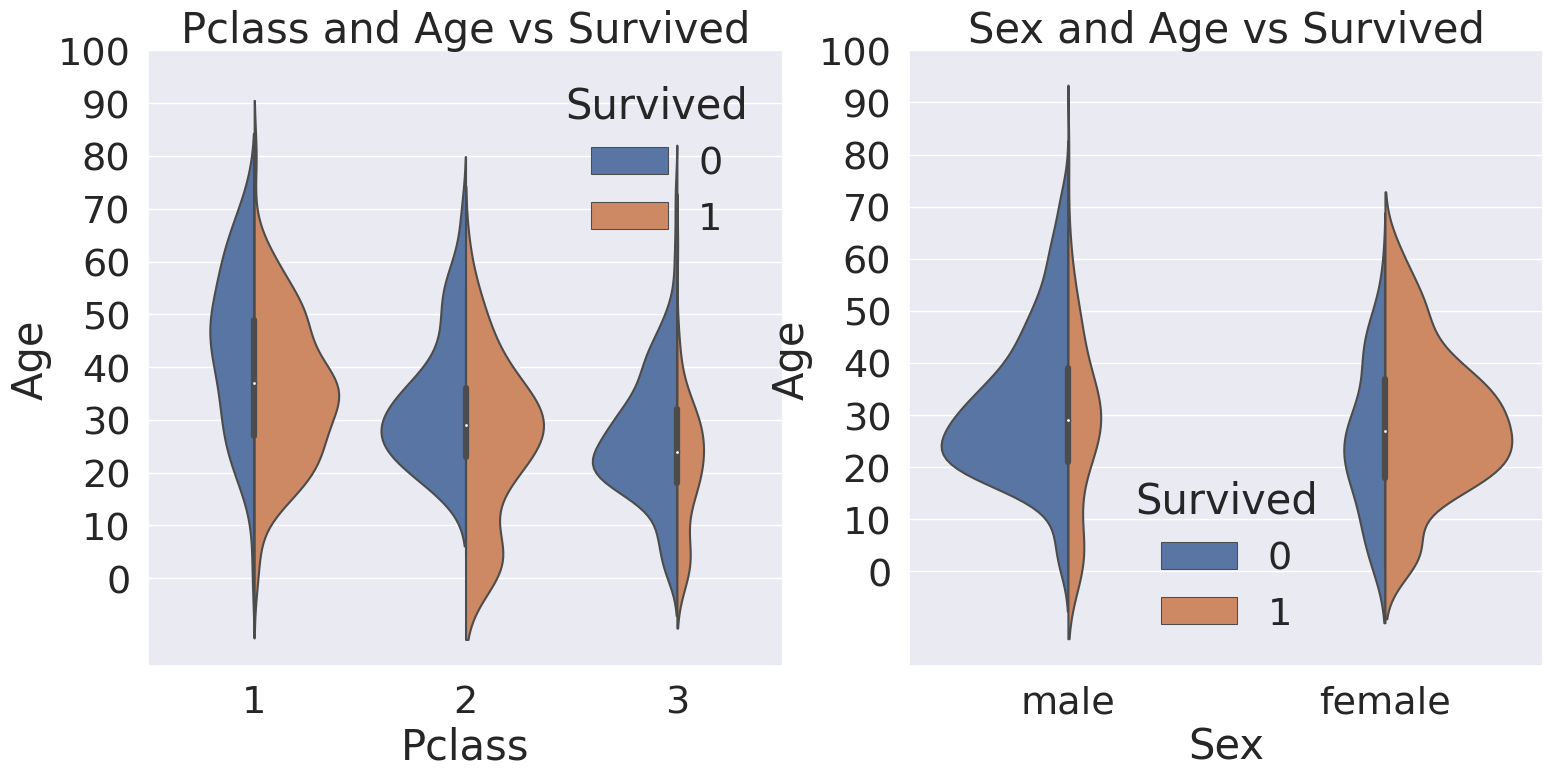

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot(x='Pclass', y = 'Age', hue='Survived', data=df_train, scale = 'count', split=True, ax=ax[0]) # count : 숫자의 개념(카운트) => 실제 카운트를 보기 쉬움
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x = 'Sex', y = 'Age', hue='Survived', data=df_train, scale = 'count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

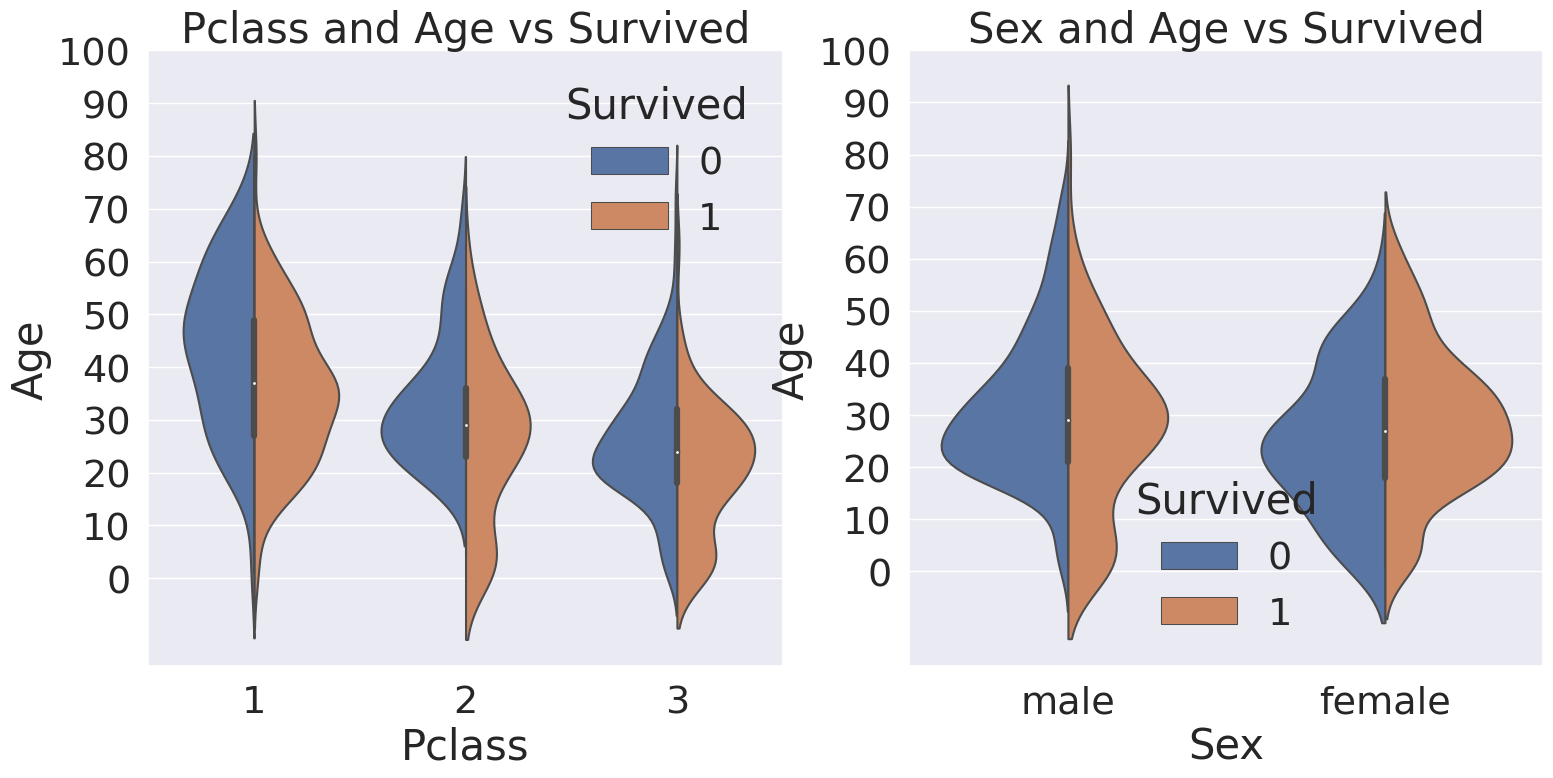

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot(x='Pclass', y = 'Age', hue='Survived', data=df_train, scale = 'area', split=True, ax=ax[0]) # area : 비율의 개념 => 분포를 보기 쉬움
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x = 'Sex', y = 'Age', hue='Survived', data=df_train, scale = 'area', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### Embarked

<Axes: xlabel='Embarked'>

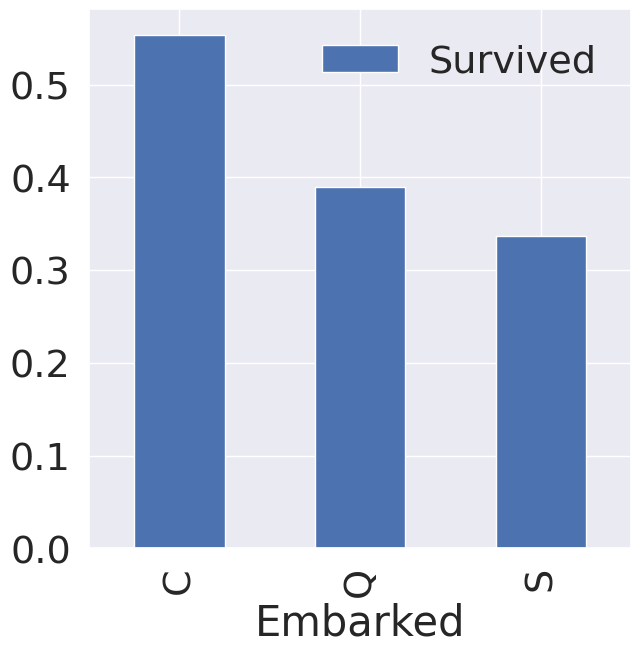

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending = False).plot.bar(ax = ax)

In [ ]:
df_train[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
df_train[['Embarked', 'Survived']].groupby('Embarked').mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


생존 확률에 차이가 있어보임

In [ ]:
# 모델이 어떤것을 중점적으로 해서 결과를 예측하는지 => Feature Importance

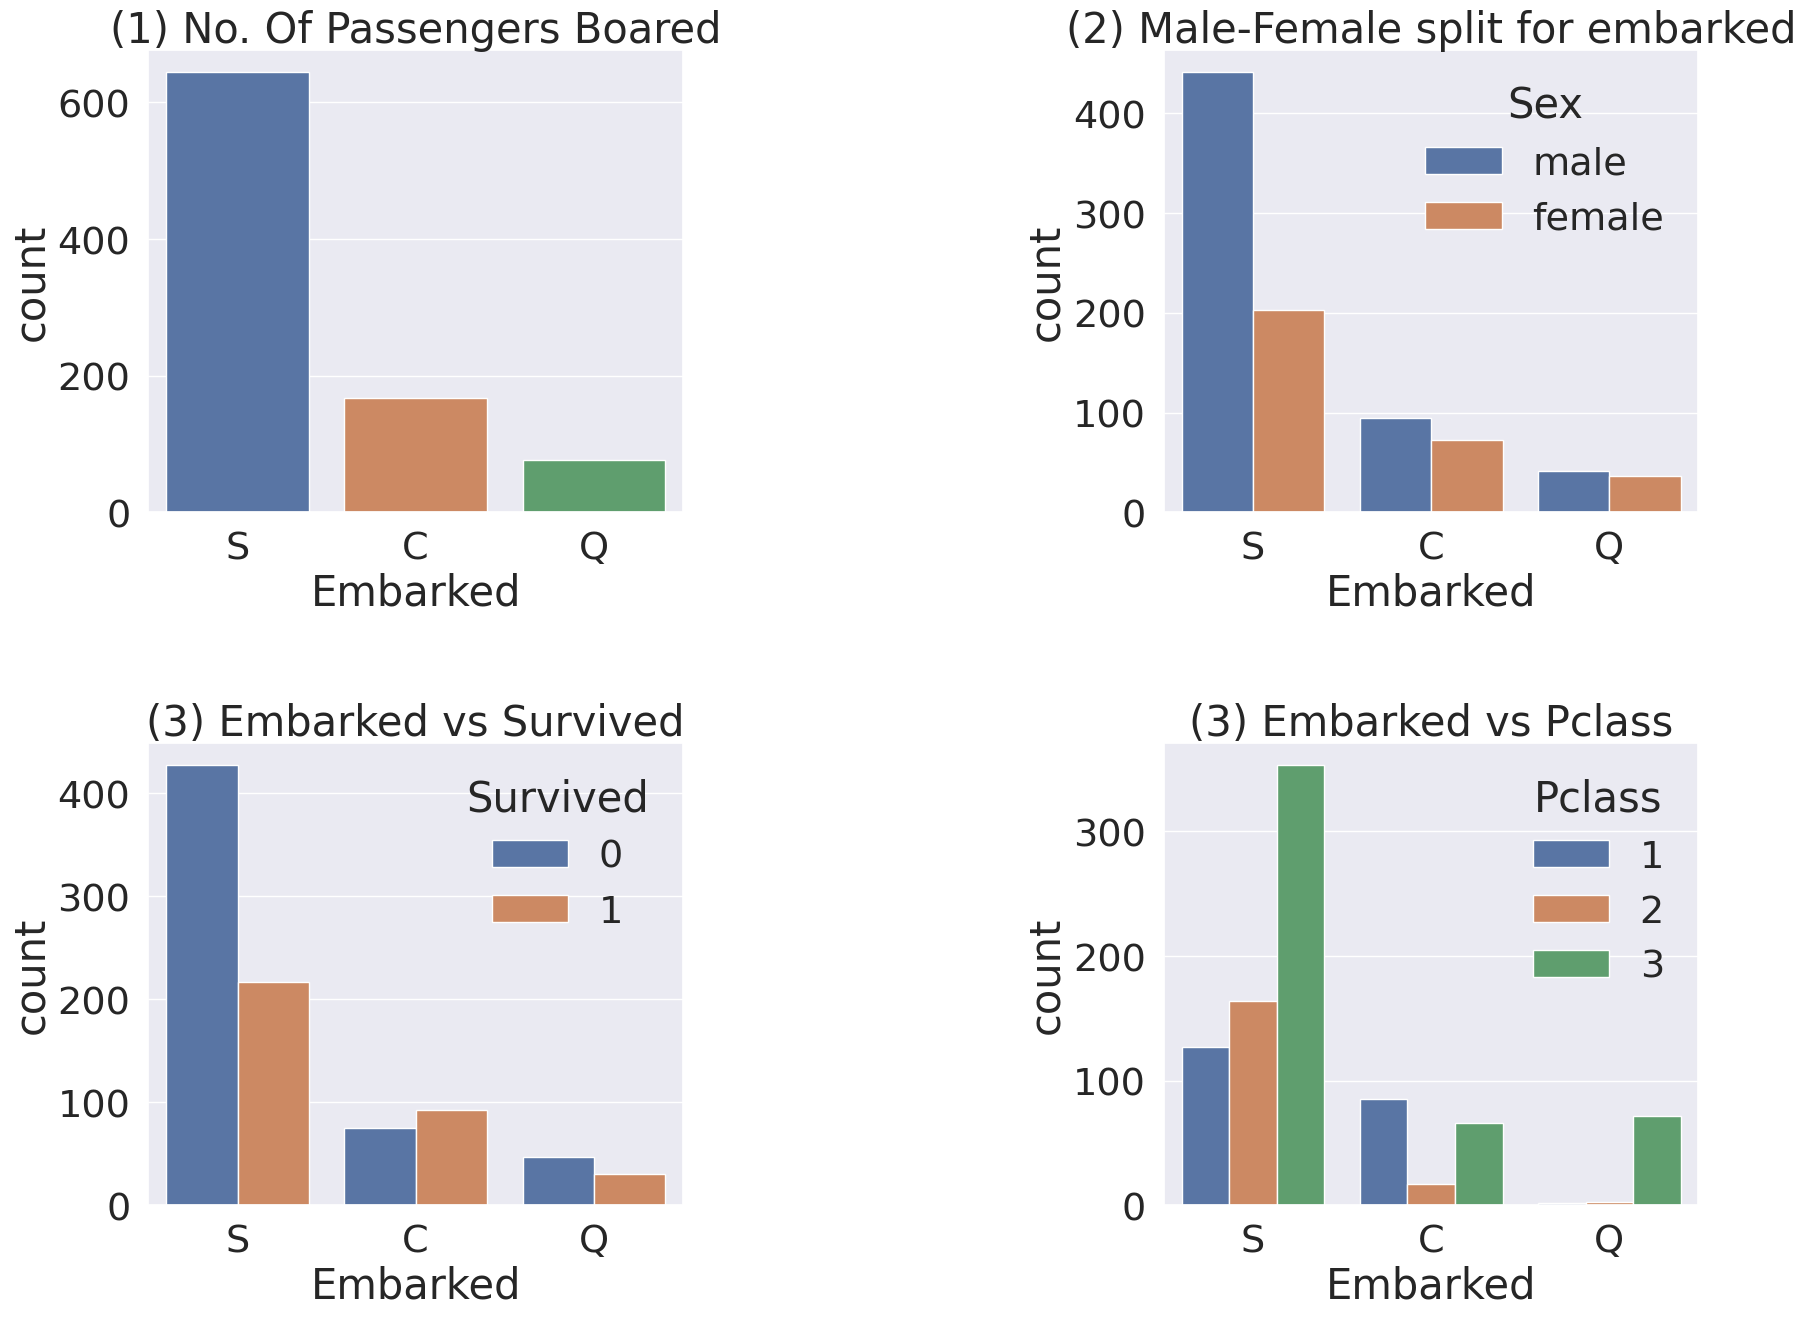

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20, 15))
sns.countplot(x = 'Embarked', data=df_train, ax=ax[0,0])
ax[0, 0].set_title('(1) No. Of Passengers Boared')

sns.countplot(x = 'Embarked', hue = 'Sex', data=df_train, ax=ax[0,1])
ax[0, 1].set_title('(2) Male-Female split for embarked')

sns.countplot(x = 'Embarked', hue = 'Survived', data=df_train, ax=ax[1,0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot(x = 'Embarked', hue = 'Pclass', data=df_train, ax=ax[1,1])
ax[1, 1].set_title('(3) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.9, hspace = 0.5)
plt.show()

Pclass와 Sex를 연관시켜서 Embarked의 생존률을 설명할 수 있음

Family : SibSp + Parch
시리즈 객체 끼리는 사칙 연산이 가능함

In [ ]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] # 가족 구성원들
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] # 가족 구성원들

In [ ]:
df_train['Family'] = df_train['Family'] + 1 # 자기 자신 포함
df_test['Family'] = df_test['Family'] + 1 # 자기 자신 포함

In [ ]:
print('Maximum size of Family: ', df_train['Family'].max())
print('Minimum size of Family: ', df_train['Family'].min())

Maximum size of Family:  11
Minimum size of Family:  1


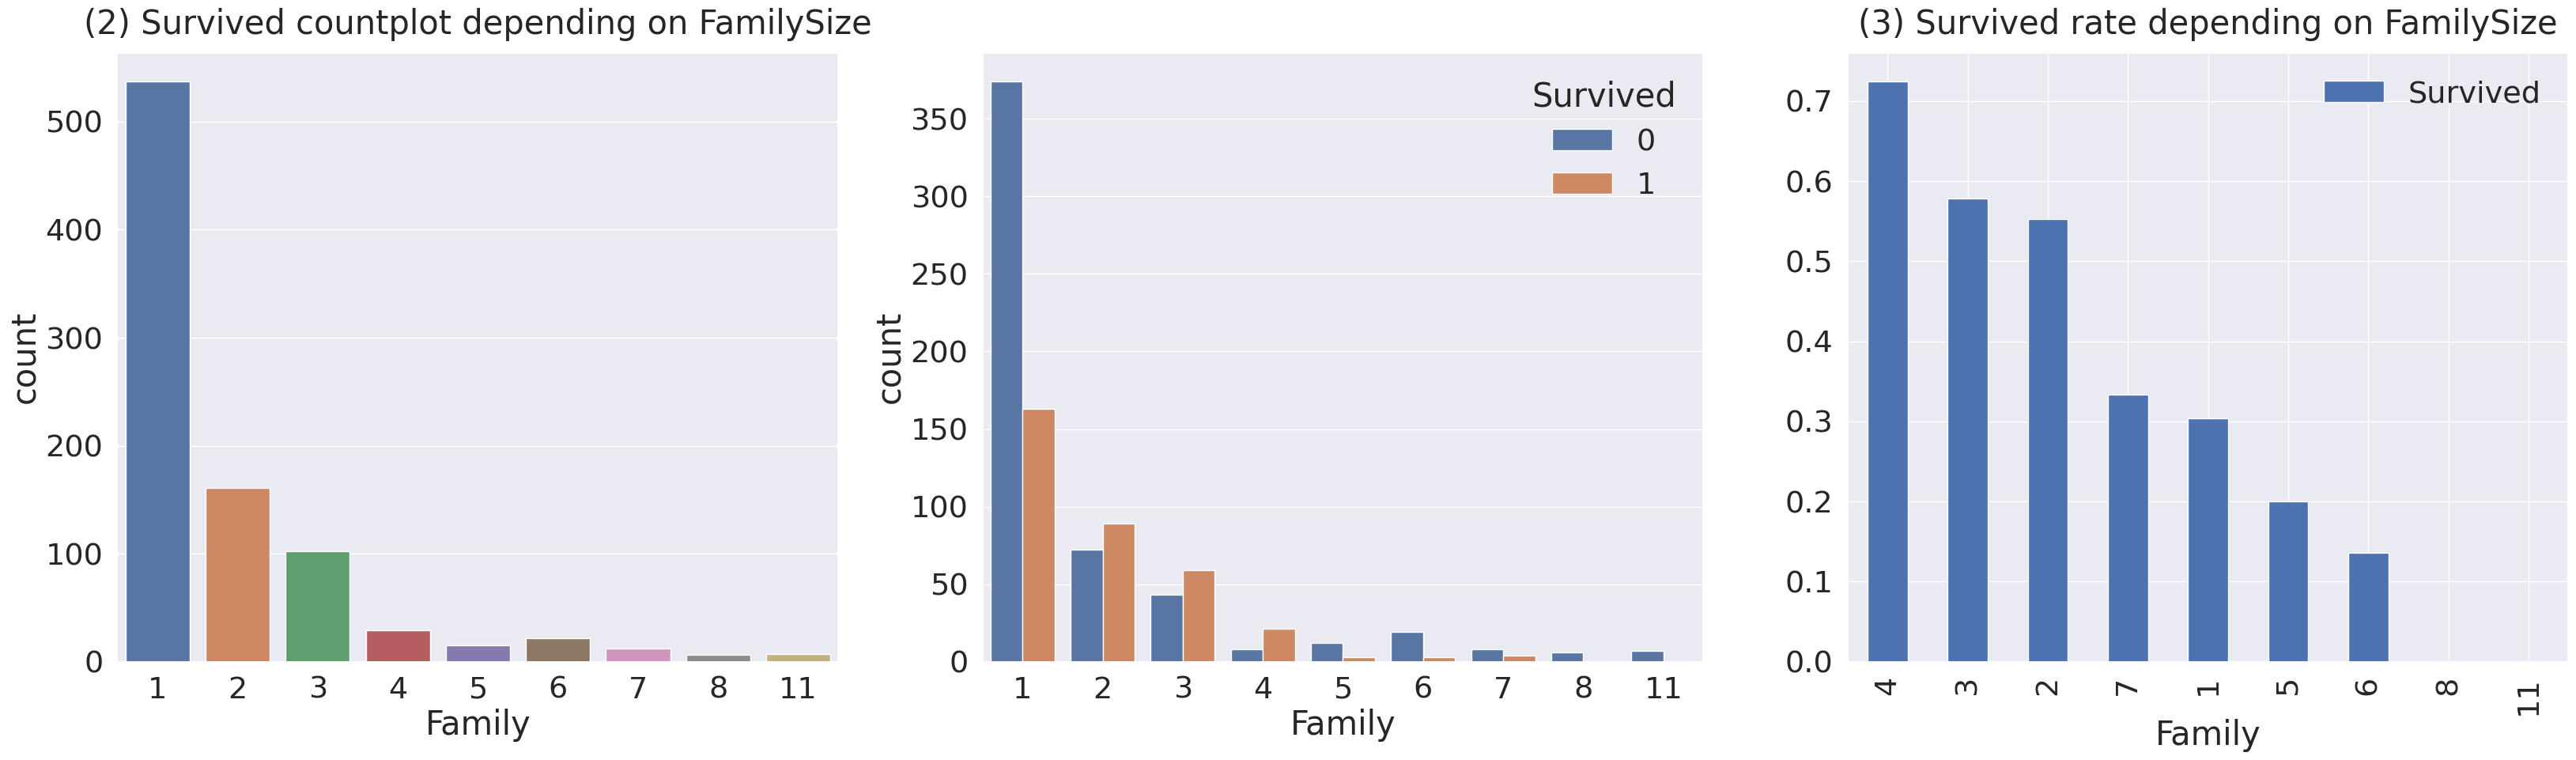

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (40, 10))
sns.countplot(x= 'Family', data= df_train, ax = ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded', y = 1.02)

sns.countplot(x= 'Family', hue = 'Survived', data= df_train, ax = ax[1])
ax[0].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['Family', 'Survived']].groupby('Family').mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

가족 구성원이 3~4명이 가장 생존율이 높다는 것을 확인 할 수 있음

### Fare

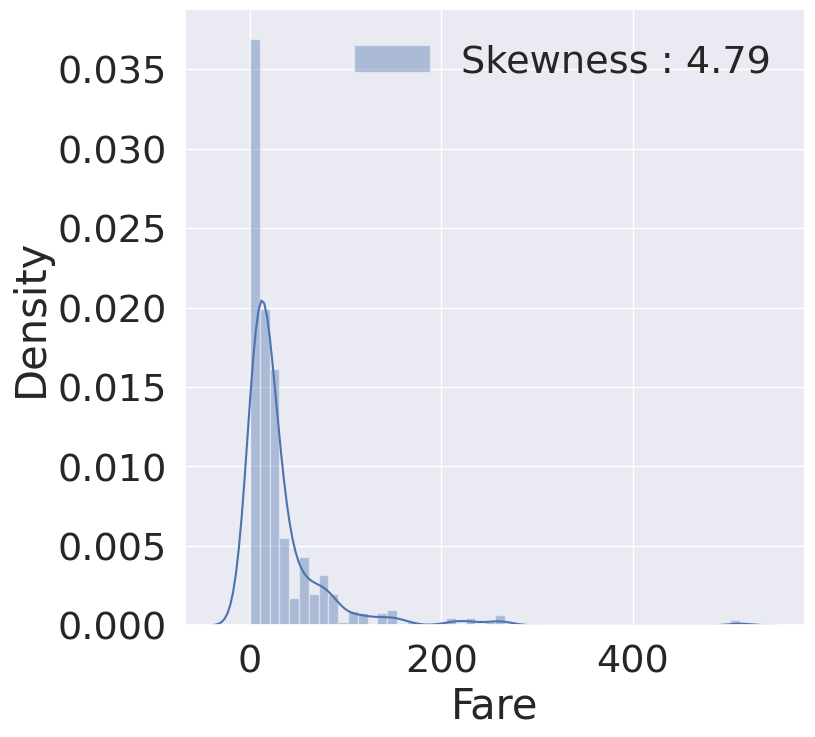

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax =ax) # 시리즈 전달 객체 전달 시 히스토그램으로 그려주는 함수, skewness = 왜도 : 평균을 중심으로 한 쪽으로 치우쳐져 있는 경향(>0이면 좌측 <0이면 우측)
g = g.legend(loc='best')

왜도가 있으면 모델이 잘못 학습할 가능성이 있음
=> Skewness를 없애는 작업이 필요
이유 : 치우쳐저 있지 않은 부분의 경우 영향력이 없어 제대로 학습이 되지 않기 때문

Feature Engneering => 모델 성능을 위해서 원래 있던 값에 연산을 취하거나 해서 조정해 주는 과정

In [ ]:
df_train['Fare'] = df_train['Fare'].map(lambda i:np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i:np.log(i) if i>0 else 0)

In [ ]:
df_train['Fare']

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

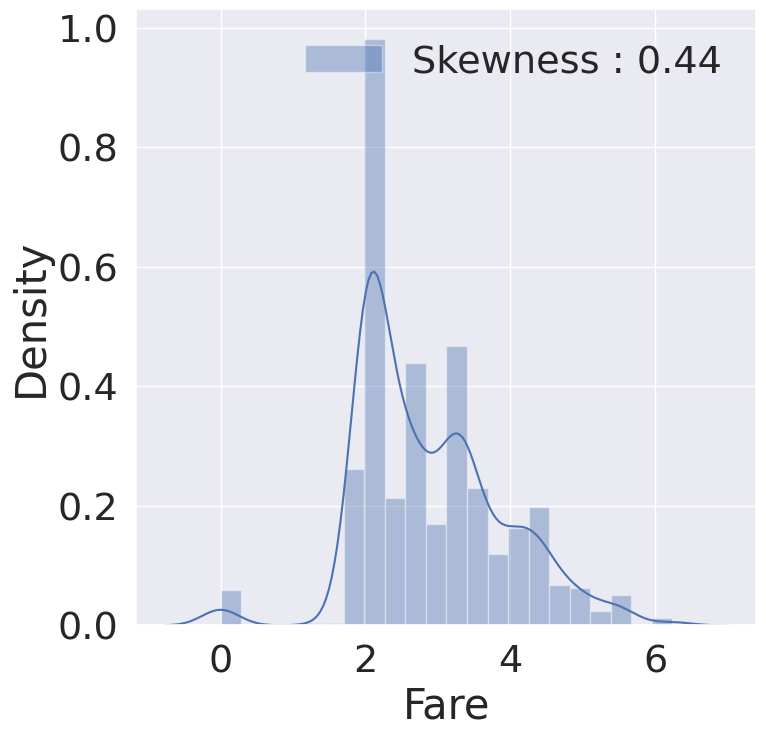

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax =ax) # 시리즈 전달 객체 전달 시 히스토그램으로 그려주는 함수, skewness = 왜도 : 평균을 중심으로 한 쪽으로 치우쳐져 있는 경향(>0이면 좌측 <0이면 우측)
g = g.legend(loc='best')

In [ ]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# Feature Engneering
Null 데이터 채우는 방법 => 모델 성능에 영향
Train Set, Test Set 둘다 필요

In [ ]:
df_train['Age'].isnull().sum()

# 공통 점을 가지는 데이터를 그룹화하여 해당 그룹에서 통계적인 수치를 내어 채우는 방법도 존재 ex) 호칭으로 그룹화 Mr. Mrs.

177

In [ ]:
df_train.Name # == df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='cool')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace = True)
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace = True)

In [ ]:
df_train['Initial'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

In [ ]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

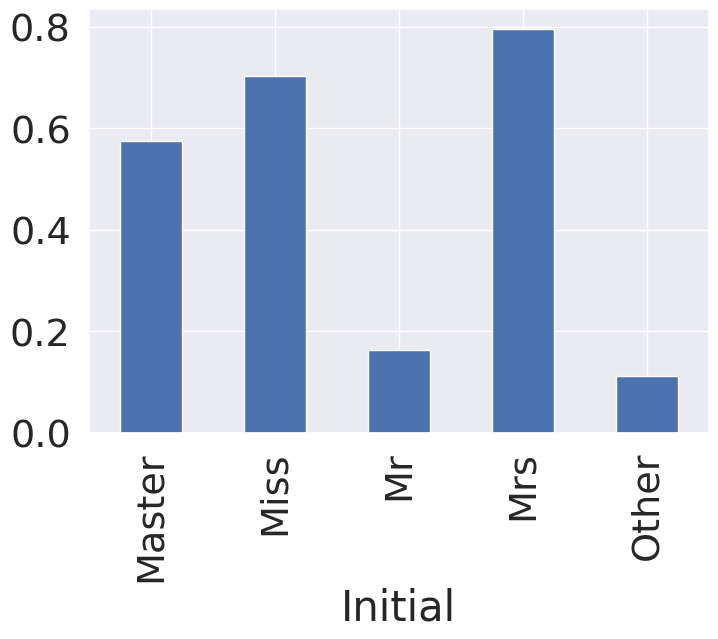

In [ ]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [ ]:
df_all = pd.concat([df_train, df_test])

In [ ]:
df_all = df_all.reset_index(drop = True)

In [ ]:
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,3.262225,4.426230
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,3.065227,2.147170
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,2.676067,1.446174
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,3.488188,2.482412
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,2.951897,1.384615


In [ ]:
(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,NaN,S,1,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,NaN,C,1,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,2.066331,NaN,S,1,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,1.978128,NaN,C,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,3.391147,C47,C,1,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,4.242046,NaN,S,11,Mr
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,1.978128,NaN,C,1,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,2.251292,NaN,S,1,Mr


In [ ]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = np.ceil(df_all.loc[(df_all['Age'].notnull()) & (df_all['Initial'] == 'Mr'), 'Age'].mean())

In [ ]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial


In [ ]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = np.ceil(df_all.loc[(df_all['Age'].notnull()) & (df_all['Initial'] == 'Mr'), 'Age'].mean())
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = np.ceil(df_all.loc[(df_all['Age'].notnull()) & (df_all['Initial'] == 'Mrs'), 'Age'].mean())
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = np.ceil(df_all.loc[(df_all['Age'].notnull()) & (df_all['Initial'] == 'Miss'), 'Age'].mean())
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = np.ceil(df_all.loc[(df_all['Age'].notnull()) & (df_all['Initial'] == 'Other'), 'Age'].mean())
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = np.ceil(df_all.loc[(df_all['Age'].notnull()) & (df_all['Initial'] == 'Master'), 'Age'].mean())

df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = np.ceil(df_all.loc[(df_all['Age'].notnull()) & (df_all['Initial'] == 'Mr'), 'Age'].mean())
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = np.ceil(df_all.loc[(df_all['Age'].notnull()) & (df_all['Initial'] == 'Mrs'), 'Age'].mean())
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = np.ceil(df_all.loc[(df_all['Age'].notnull()) & (df_all['Initial'] == 'Miss'), 'Age'].mean())
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = np.ceil(df_all.loc[(df_all['Age'].notnull()) & (df_all['Initial'] == 'Other'), 'Age'].mean())
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = np.ceil(df_all.loc[(df_all['Age'].notnull()) & (df_all['Initial'] == 'Master'), 'Age'].mean())

In [ ]:
df_train.Age.isnull().sum()

0

In [ ]:
df_test.Age.isnull().sum()

0

In [ ]:
df_train['Embarked'].isnull().sum()

2

In [ ]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df_train['Embarked'].fillna('S', inplace=True)

연속형 변수를 카테고리로 바꾸면 정보손실 일어날 수 있지만 어떤 상황에서는 더 좋을수도 있음   
ex) 11살 14살 17살 -> 10대로 묶이면서 정보가 사라짐

In [ ]:
df_train['Age_cat'] = 0

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [ ]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0

for i in range(1, 10):
  df_train.loc[df_train['Age'] >= (i * 10) , 'Age_cat'] = i

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [ ]:
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0

for i in range(1, 10):
  df_test.loc[df_test['Age'] >= (i * 10) , 'Age_cat'] = i

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.057860,NaN,Q,1,Mr,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.945910,NaN,S,2,Mrs,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.270836,NaN,Q,1,Mr,6.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.159003,NaN,S,1,Mr,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.508582,NaN,S,3,Mrs,2.0


In [ ]:
def category_age(x):
  return x // 10

In [ ]:
df_train['Age_cat2'] = df_train['Age'].apply(category_age)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial,Age_cat,Age_cat2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3,3.0


In [ ]:
(df_train['Age_cat2'] == df_train['Age_cat']).all() # 모든게 True일때 True

True

In [ ]:
(df_train['Age_cat2'] == df_train['Age_cat']).any() # 하나라도 True일때 True

True

In [ ]:
df_train.drop(['Age', 'Age_cat2'], axis=1, inplace=True)
df_test.drop('Age', axis=1, inplace=True)

fillna, apply 사용법에 대해 배움

## 스트링 데이터를 수치형 데이터로 바꾸기
모델이 학습할 수 있도록

In [ ]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [ ]:
df_train['Initial'] = df_train['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})
df_test['Initial'] = df_test['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})

특정 컬럼의 데이터 범위 파악

In [ ]:
df_train.Embarked.unique() # numpy.array

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df_train.Embarked.value_counts() # 갯수까지 줌(시리즈 객체)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

In [ ]:
df_test['Embarked'] = df_test['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,2.057860,NaN,1,1,2,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1.945910,NaN,2,2,3,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,2.270836,NaN,1,1,2,6.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,2.159003,NaN,2,1,2,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,2.508582,NaN,2,3,3,2.0


In [ ]:
df_train.Embarked.isnull().any() # True일 경우 하나라도 null값이 존재

False

In [ ]:
df_train.Embarked.isnull().sum() # null 갯수 확인

0

In [ ]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1})

## 상관관계 구하기
선형적 상관관계 : 비례, 반비례   
=> 피어슨 상관계수 활용   
1에 가까우면 양의 상관관계   
0에 가까우면 관계가 없음   
-1에 가까우면 음의 상관관계

In [ ]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Family', 'Initial', 'Age_cat']]

<Axes: title={'center': 'Pearson Correalation of Features'}>

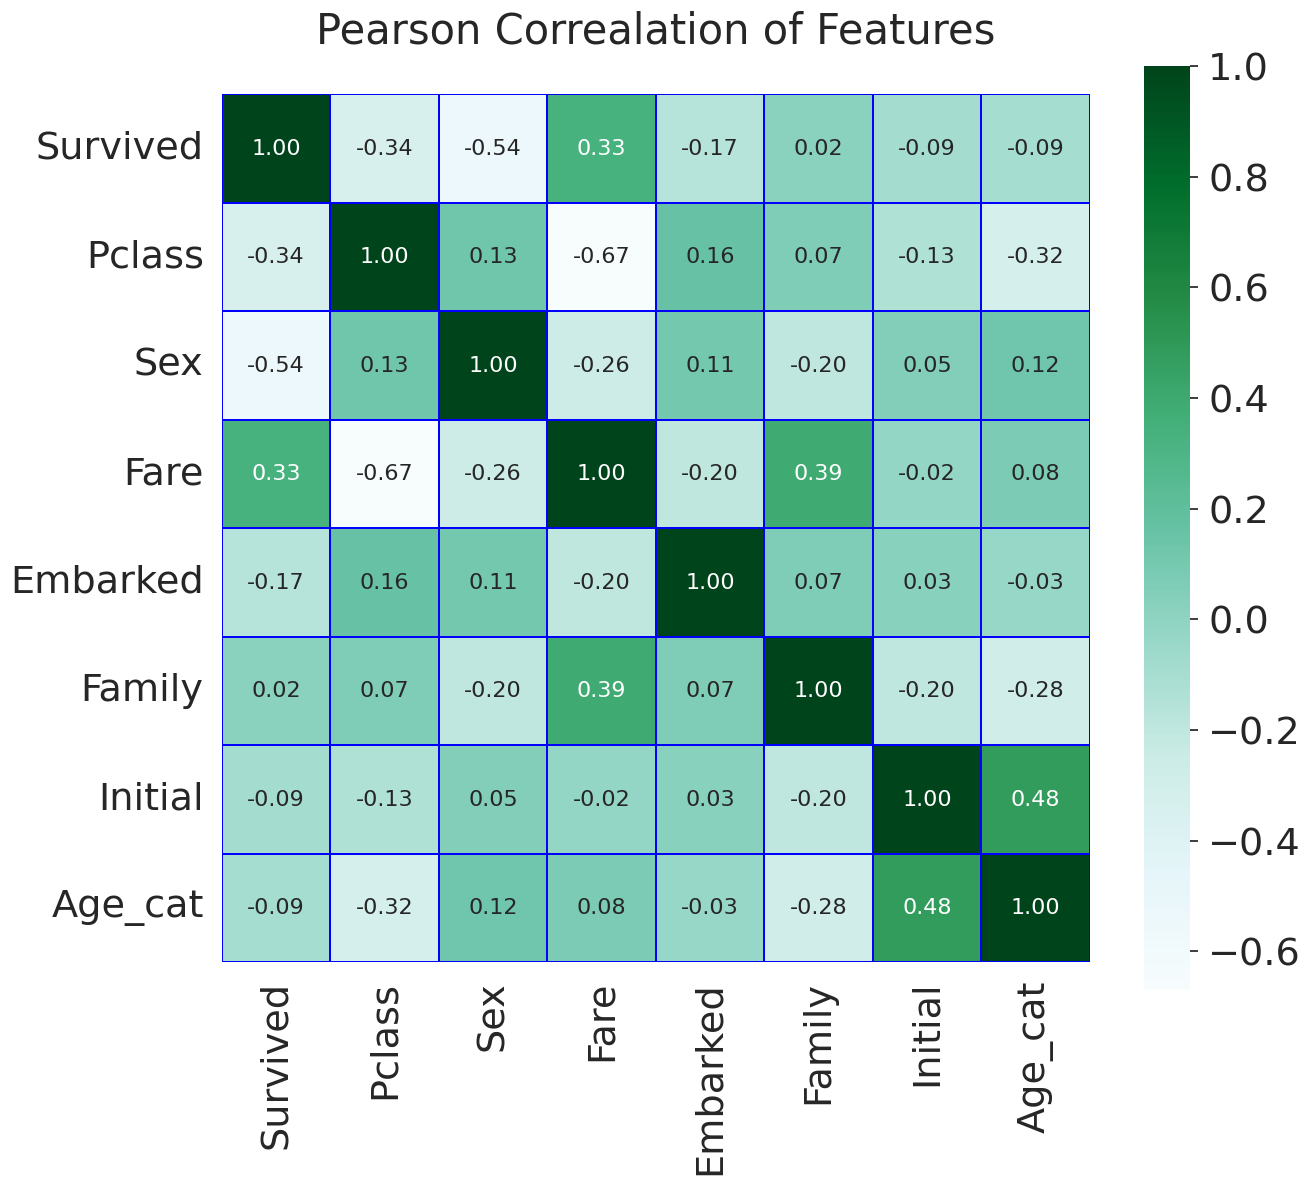

In [ ]:
colormap = plt.cm.BuGn # virdis
plt.figure(figsize=(14,12))
plt.title('Pearson Correalation of Features', y = 1.05, size = 30)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'Blue', annot = True, annot_kws={'size' : 16}, fmt = '.2f')

상관관계가 1인 경우 중복(Redundant) 관계이므로 없어도 되는 피쳐라고 판단할 수 있다.
   
   => 둘다 똑같은 하나의 정보를 나타내므로   

   해당 테이블 그림에서는 Redundant한 피쳐는 없다고 볼 수 있음

## 원 핫 인코딩
모델의 성능을 높이기 위함    
카테고리 데이터의 정보를 카테고리 정보로만 사용할 수 있도록 함   
숫자로 부여한다면 크기가 담기게 된다는 단점 상쇄   
의미 없는 분석을 하지 않도록 해줌 ex) 축구의 5조는 4조보다 높냐? => 4<5이므로 5조가 높지만 의미 없음=> 중요한건 5조인지 아닌지, 4조인지 아닌지가 중요함

In [ ]:
pd.get_dummies(df_train, columns=['Initial'], prefix='Ini222tial')

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_cat,Ini222tial_0,Ini222tial_1,Ini222tial_2,Ini222tial_3,Ini222tial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,2.564949,NaN,2,1,2,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,3.401197,B42,2,1,1,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,3.154870,NaN,2,4,2,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,3.401197,C148,0,1,2,0,0,1,0,0


In [ ]:
df_train = pd.get_dummies(df_train, columns=['Initial'])
df_test = pd.get_dummies(df_test, columns=['Initial'])

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,892,3,"Kelly, Mr. James",1,0,0,330911,2.057860,NaN,1,1,3.0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,1.945910,NaN,2,2,4.0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,2.270836,NaN,1,1,6.0,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,2.159003,NaN,2,1,2.0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,2.508582,NaN,2,3,2.0,0,0,0,1,0


In [ ]:
df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_test = pd.get_dummies(df_test, columns=['Embarked'])

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Family,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Family,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,892,3,"Kelly, Mr. James",1,0,0,330911,2.057860,NaN,1,3.0,0,0,1,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,1.945910,NaN,2,4.0,0,0,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,2.270836,NaN,1,6.0,0,0,1,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,2.159003,NaN,1,2.0,0,0,1,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,2.508582,NaN,3,2.0,0,0,0,1,0,0,0,1


In [ ]:
#from sklearn.preprocessing import OneHotEncoder => 데이터 프레임을 다룰때는 pd.get_dummies() 가 더 편리

원핫인코딩 단점 : 카테고리 레벨이 100개가 되면 100개의 컬럼이 생겨버림 => 다른 방식의 처리 방법이 필요

## 안 쓰는 피쳐 빼주기

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Family,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [ ]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis= 1, inplace = True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis= 1, inplace = True)

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Fare,Family,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [ ]:
df_test.head()

,Pclass,Sex,Fare,Family,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3.0,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4.0,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6.0,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2.0,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2.0,0,0,0,1,0,0,0,1


EDA, Null 데이터 채우기, Feature Engeeneering을 통해서 필요한 피쳐만 남김

# 모델 학습 및 예측

In [ ]:
from sklearn.ensemble import RandomForestClassifier # 2진 분류 문제이므로 분류 모델 사용
from sklearn import metrics # sklearn은 머신러닝 관련 모든 작업을 통일된 인터페이스
from sklearn.model_selection import train_test_split # train 데이터를 훈련, 검증으로 나눔

In [ ]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

# 목적으로 하는것은 테스트셋, train 세트로 학습된 모델을 테스트하기 위해, 성능을 위해서는 검증 셋으로 나누어 테스트하는것이 필요함
# 테스트 셋은 말 그대로 테스트를 위한 것

In [ ]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.2)

In [ ]:
# 파라미터 튜닝에 따라 모델의 성능이 달라짐 => 그리드 서치 등 방법 사용

In [ ]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [ ]:
prediction = model.predict(X_vld)

In [ ]:
prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0])

In [ ]:
print('총 {}명 중 {:.2f}% 정확도로 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 79.33% 정확도로 맞춤


In [ ]:
(prediction == y_vld).sum() / y_vld.shape[0]

0.7932960893854749

## Feature Importance
학습된 모델이 어떤 feature에 영향을 많이 받았는지 확인할 수 있다. => 어떤 피쳐가 큰 영향을 주는지 확인할 수 있다.

In [ ]:
model.feature_importances_

array([0.09057694, 0.13538303, 0.30908604, 0.09634181, 0.1147361 ,
       0.01624978, 0.03426204, 0.12172067, 0.04147918, 0.00532543,
       0.01275066, 0.00874881, 0.01333951])

In [ ]:
df_train.drop('Survived', axis=1).columns

Index(['Pclass', 'Sex', 'Fare', 'Family', 'Age_cat', 'Initial_0', 'Initial_1',
       'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0', 'Embarked_1',
       'Embarked_2'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Pclass', 'Sex', 'Fare', 'Family', 'Age_cat', 'Initial_0', 'Initial_1',
       'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0', 'Embarked_1',
       'Embarked_2'],
      dtype='object')

In [ ]:
feature_importance = model.feature_importances_
feat_imp = pd.Series(feature_importance, index=df_test.columns)

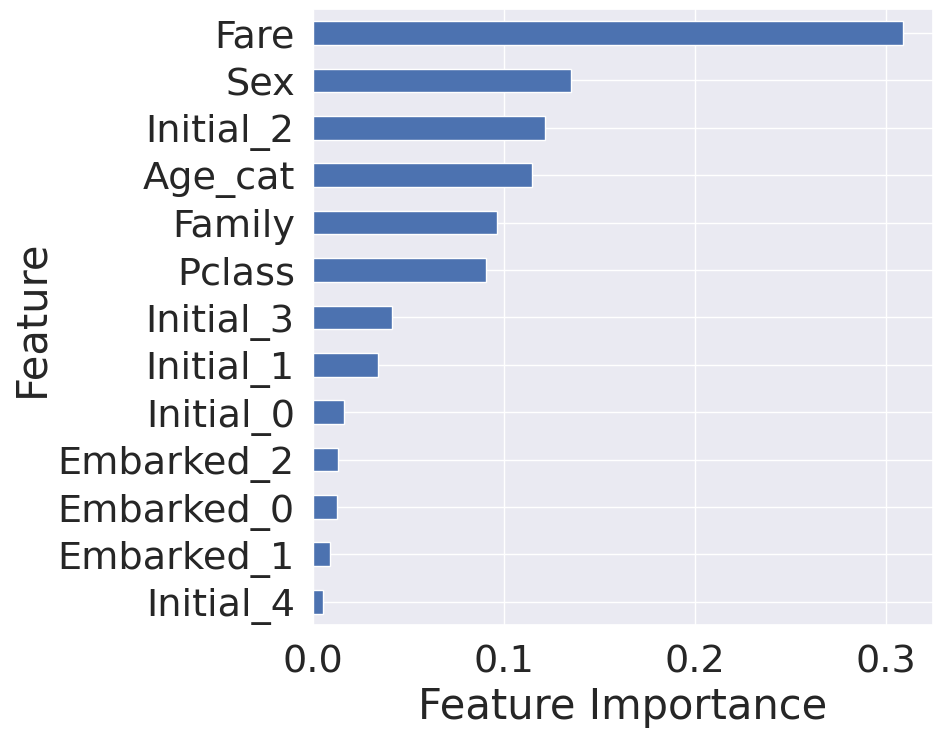

In [ ]:
plt.figure(figsize=(8, 8))
feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Fare, Sex, Initial_2 데이터가 생존에 영향을 준다는 것을 알 수 있음   
영향력이 적은 피쳐는 빼는 판단을 할 수도 있음 => feature Selection

In [ ]:
submission = pd.read_csv('./gender_submission.csv')

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
df_test.isnull().sum()

Pclass        0
Sex           0
Fare          0
Family        0
Age_cat       0
Initial_0     0
Initial_1     0
Initial_2     0
Initial_3     0
Initial_4     0
Embarked_0    0
Embarked_1    0
Embarked_2    0
dtype: int64

<Axes: >

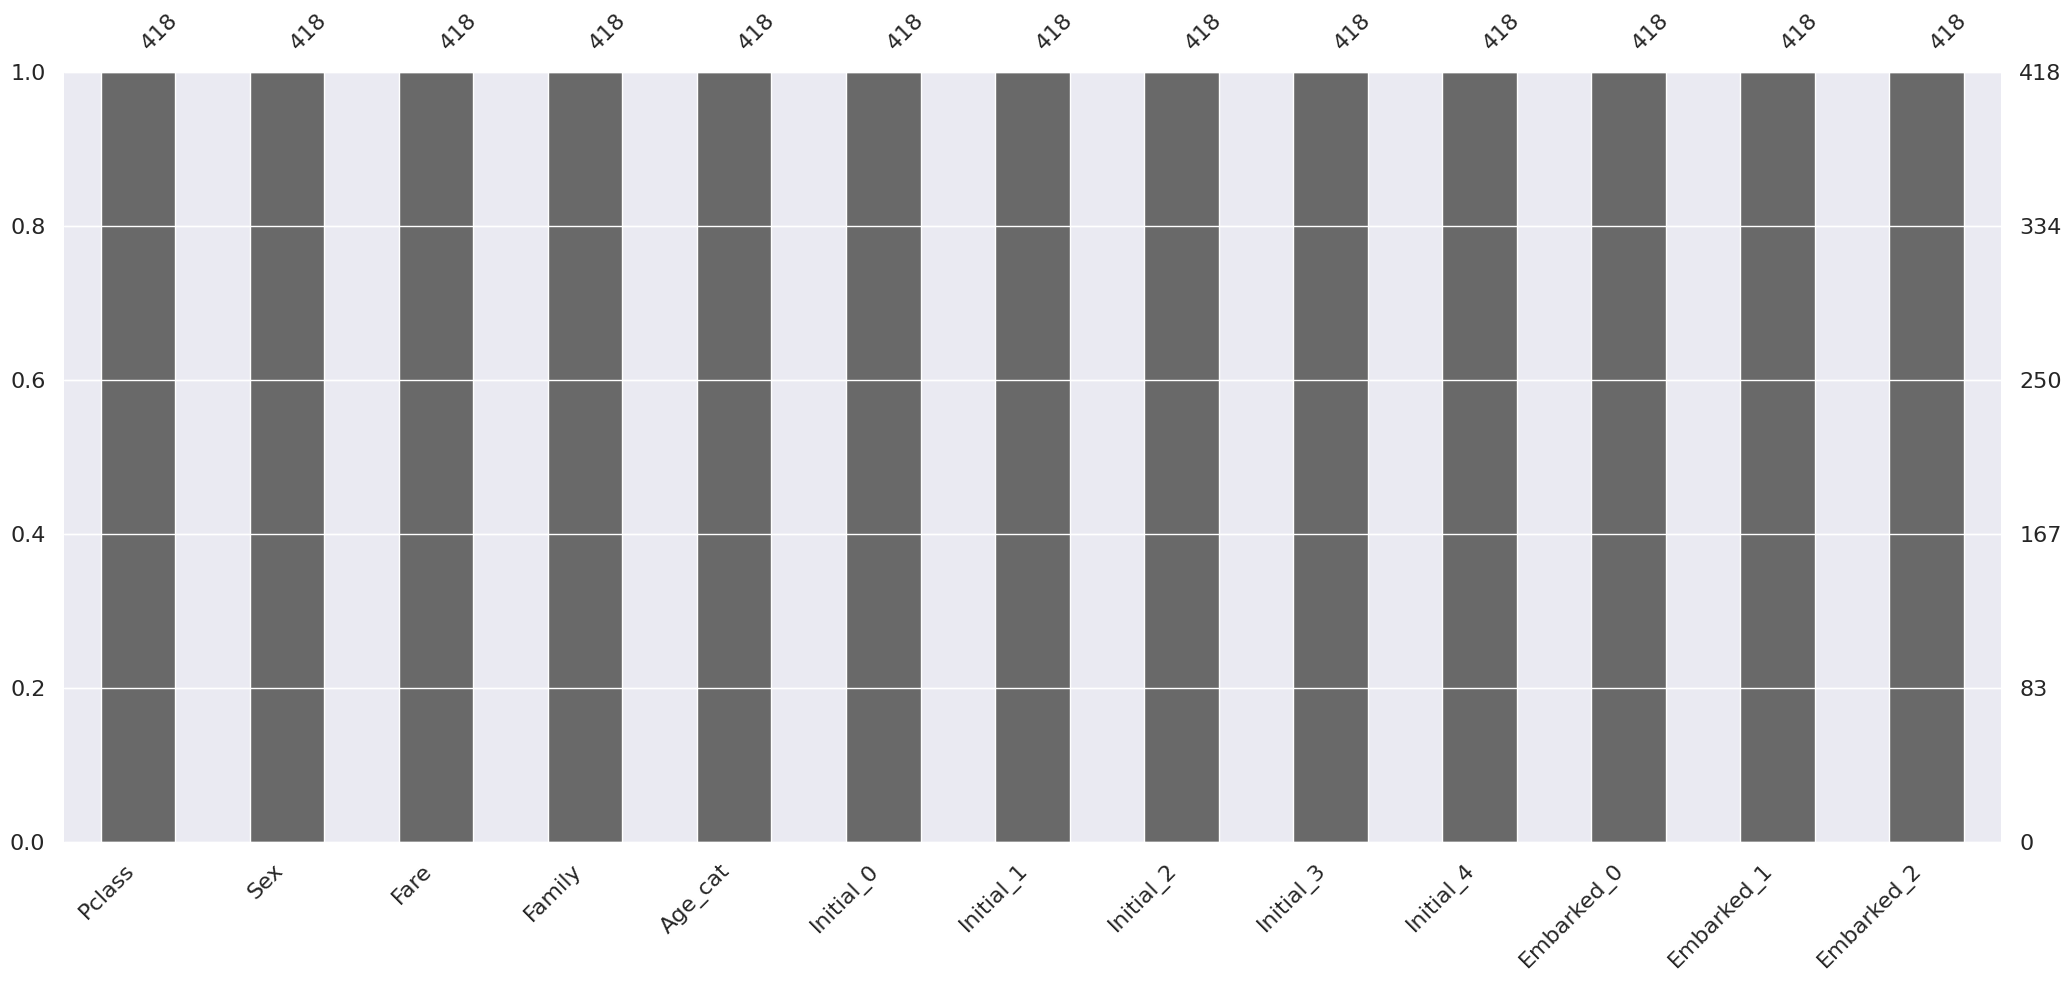

In [ ]:
msno.bar(df_test)

In [ ]:
prediction = model.predict(X_test)

Pclass        0
Sex           0
Fare          0
Family        0
Age_cat       0
Initial_0     0
Initial_1     0
Initial_2     0
Initial_3     0
Initial_4     0
Embarked_0    0
Embarked_1    0
Embarked_2    0
dtype: int64

In [ ]:
print('총 {}명 중 {:.2f}% 정확도로 맞춤'.format(submission['Survived'].shape[0], 100 * metrics.accuracy_score(prediction, submission['Survived'])))

총 418명 중 83.01% 정확도로 맞춤


In [ ]:
submission.to_csv('./my_first_submission.csv', index=False)